## Navigate to the Correct Directory

The following code navigates to the dataprocessing directory.

In [1]:
cd ../dataprocessing

/usr/local/google/home/carverforbes/activity-recognition/location/lbs/activity/audioset/dataprocessing


## Call the Import Statements

The following code imports the necessary code to run the code in the rest of this notebook.

In [2]:
# import statements
import audio_processing as ap

import functools
import os
import sys
import datetime
import gc

from absl import logging
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


## Feature Extraction
Configure the following parameters to extract the desired features from a specified csv file to a specific destination directory.

In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'gunshot_50_50'
labels = ['Gunshot, gunfire']
available_features = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate']
features_to_extract = ['mfcc']
last_features = None
redo = False

In [5]:
def dataframe_to_csv(dataframe, dest_path):
    start_time = datetime.datetime.now()
    stop = dataframe.index.stop
    begin = 0
    end = 100
    count = 0
    while end < stop + 100:
        df = dataframe.iloc[begin:end, :].copy()
        for column in df.columns:
            for i in range(df[column].size):
                i = i + count * 100
                if isinstance(df[column][i], np.ndarray):
                    df[column][i] = df[column][i].tolist()
        if count == 0:
            df.to_csv(dest_path, index=False, header=True)
        else:
            df.to_csv(dest_path, mode='a', index=False, header=True)
        begin += 100
        end += 100
        count += 1
    end_time = datetime.datetime.now()
    function_duration = end_time - start_time
    
        
    print('Created the csv file at the destination path in {} seconds.'.format(
        function_duration))

In [6]:
def csv_to_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    for column in df.columns:
        for i in range(df[column].size):
            if isinstance(df[column][i], str):
                temp = df[column][i][1:-1]
                temp = temp.replace(',', ' ').split(']')
                new_list = []
                for item in temp:
                    if item == '':
                        continue
                    item = item.replace('[', '').strip().split()
                    item = [float(num) for num in item]
                    arr = np.array(item)
                    new_list.append(arr)
                new_arr = np.array(new_list)
                df[column][i] = new_arr
    return df

In [7]:
# Import the dataset as a pandas DataFrame object.
features = '_'.join(features_to_extract)
csv_path = os.path.join(dest_dir, filename + '_' + features + '.csv')
features_changed = last_features is None or features_to_extract != last_features
last_features = features_to_extract
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, redo)

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:(127, 51.380013)
INFO:absl:extracted features
INFO:absl:(128, 51.677469)
INFO:absl:extracted features
INFO:absl:(129, 51.93612)
INFO:absl:extracted features
INFO:absl:(130, 52.302837)
INFO:absl:extracted features
INFO:absl:(131, 52.604789)
INFO:absl:extracted features
INFO:absl:(132, 52.946299)
INFO:absl:extracted features
INFO:absl:(133, 53.306911)
INFO:absl:extracted features
INFO:absl:(134, 53.64485)
INFO:absl:extracted features
INFO:absl:(135, 53.868252)
INFO:absl:extracted features
INFO:absl:(136, 54.158338)
INFO:absl:extracted features
INFO:absl:(137, 54.449553)
INFO:absl:extracted features
INFO:absl:(138, 54.765946)
INFO:absl:extracted features
INFO:absl:(139, 54.992048)
INFO:absl:extracted features
INFO:absl:(140, 55.392718)
INFO:absl:extracted features
INFO:absl:(141, 55.6607)
INFO:absl:extracted features
INFO:absl:(142, 55.964463)
INFO:absl:extracted features
INFO:absl:(143, 56.237192)
INFO:absl:extracted features
INFO:absl:(144, 56.499987)
INFO:absl:extracted featu

INFO:absl:(274, 95.330746)
INFO:absl:extracted features
INFO:absl:(275, 95.655339)
INFO:absl:extracted features
INFO:absl:(276, 95.933634)
INFO:absl:extracted features
INFO:absl:(277, 96.31151)
INFO:absl:extracted features
INFO:absl:(278, 96.582179)
INFO:absl:extracted features
INFO:absl:(279, 96.834875)
INFO:absl:extracted features
INFO:absl:(280, 97.124592)
INFO:absl:extracted features
INFO:absl:(281, 97.364116)
INFO:absl:extracted features
INFO:absl:(282, 97.662666)
INFO:absl:extracted features
INFO:absl:(283, 97.930679)
INFO:absl:extracted features
INFO:absl:(284, 98.340971)
INFO:absl:extracted features
INFO:absl:(285, 98.627728)
INFO:absl:extracted features
INFO:absl:(286, 98.888991)
INFO:absl:extracted features
INFO:absl:(287, 99.24299)
INFO:absl:extracted features
INFO:absl:(288, 99.476195)
INFO:absl:extracted features
INFO:absl:(289, 99.876948)
INFO:absl:extracted features
INFO:absl:(290, 100.185062)
INFO:absl:extracted features
INFO:absl:(291, 100.392878)
INFO:absl:extracted f

INFO:absl:extracted features
INFO:absl:(419, 139.239713)
INFO:absl:extracted features
INFO:absl:(420, 139.542034)
INFO:absl:extracted features
INFO:absl:(421, 139.852284)
INFO:absl:extracted features
INFO:absl:(422, 140.089518)
INFO:absl:extracted features
INFO:absl:(423, 140.363581)
INFO:absl:extracted features
INFO:absl:(424, 140.708189)
INFO:absl:extracted features
INFO:absl:(425, 141.01643)
INFO:absl:extracted features
INFO:absl:(426, 141.450959)
INFO:absl:extracted features
INFO:absl:(427, 141.753868)
INFO:absl:extracted features
INFO:absl:(428, 142.03689)
INFO:absl:extracted features
INFO:absl:(429, 142.273735)
INFO:absl:extracted features
INFO:absl:(430, 142.542222)
INFO:absl:extracted features
INFO:absl:(431, 142.75731)
INFO:absl:extracted features
INFO:absl:(432, 143.039102)
INFO:absl:extracted features
INFO:absl:(433, 143.28228)
INFO:absl:extracted features
INFO:absl:(434, 143.611742)
INFO:absl:extracted features
INFO:absl:(435, 143.85707)
INFO:absl:extracted features
INFO:ab

INFO:absl:(563, 180.586789)
INFO:absl:extracted features
INFO:absl:(564, 180.89271)
INFO:absl:extracted features
INFO:absl:(565, 181.199521)
INFO:absl:extracted features
INFO:absl:(566, 181.442437)
INFO:absl:extracted features
INFO:absl:(567, 181.674209)
INFO:absl:extracted features
INFO:absl:(568, 181.918973)
INFO:absl:extracted features
INFO:absl:(569, 182.258509)
INFO:absl:extracted features
INFO:absl:(570, 182.514228)
INFO:absl:extracted features
INFO:absl:(571, 182.78589)
INFO:absl:extracted features
INFO:absl:(572, 182.988917)
INFO:absl:extracted features
INFO:absl:(573, 183.213682)
INFO:absl:extracted features
INFO:absl:(574, 183.63076)
INFO:absl:extracted features
INFO:absl:(575, 183.958451)
INFO:absl:extracted features
INFO:absl:(576, 184.211879)
INFO:absl:extracted features
INFO:absl:(577, 184.554747)
INFO:absl:extracted features
INFO:absl:(578, 184.834938)
INFO:absl:extracted features
INFO:absl:(579, 185.078273)
INFO:absl:extracted features
INFO:absl:(580, 185.411996)
INFO:a

INFO:absl:extracted features
INFO:absl:(708, 223.279527)
INFO:absl:extracted features
INFO:absl:(709, 223.523751)
INFO:absl:extracted features
INFO:absl:(710, 223.816358)
INFO:absl:extracted features
INFO:absl:(711, 224.107116)
INFO:absl:extracted features
INFO:absl:(712, 224.360935)
INFO:absl:extracted features
INFO:absl:(713, 224.668915)
INFO:absl:extracted features
INFO:absl:(714, 224.887859)
INFO:absl:extracted features
INFO:absl:(715, 225.185356)
INFO:absl:extracted features
INFO:absl:(716, 225.473039)
INFO:absl:extracted features
INFO:absl:(717, 225.766677)
INFO:absl:extracted features
INFO:absl:(718, 226.12281)
INFO:absl:extracted features
INFO:absl:(719, 226.394792)
INFO:absl:extracted features
INFO:absl:(720, 226.797025)
INFO:absl:extracted features
INFO:absl:(721, 227.052935)
INFO:absl:extracted features
INFO:absl:(722, 227.368883)
INFO:absl:extracted features
INFO:absl:(723, 227.623924)
INFO:absl:extracted features
INFO:absl:(724, 227.881651)
INFO:absl:extracted features
INF

INFO:absl:(852, 269.109954)
INFO:absl:extracted features
INFO:absl:(853, 269.420676)
INFO:absl:extracted features
INFO:absl:(854, 269.694577)
INFO:absl:extracted features
INFO:absl:(855, 270.117212)
INFO:absl:extracted features
INFO:absl:(856, 270.498638)
INFO:absl:extracted features
INFO:absl:(857, 270.882028)
INFO:absl:extracted features
INFO:absl:(858, 271.281776)
INFO:absl:extracted features
INFO:absl:(859, 271.647047)
INFO:absl:extracted features
INFO:absl:(860, 271.937831)
INFO:absl:extracted features
INFO:absl:(861, 272.252737)
INFO:absl:extracted features
INFO:absl:(862, 272.652842)
INFO:absl:extracted features
INFO:absl:(863, 272.915966)
INFO:absl:extracted features
INFO:absl:(864, 273.243605)
INFO:absl:extracted features
INFO:absl:(865, 273.482365)
INFO:absl:extracted features
INFO:absl:(866, 273.819195)
INFO:absl:extracted features
INFO:absl:(867, 274.13603)
INFO:absl:extracted features
INFO:absl:(868, 274.433855)
INFO:absl:extracted features
INFO:absl:(869, 274.949998)
INFO

INFO:absl:(996, 316.265515)
INFO:absl:extracted features
INFO:absl:(997, 316.577051)
INFO:absl:extracted features
INFO:absl:(998, 316.815856)
INFO:absl:extracted features
INFO:absl:(999, 317.283913)
INFO:absl:extracted features
INFO:absl:(1000, 317.552584)
INFO:absl:extracted features
INFO:absl:(1001, 317.827993)
INFO:absl:extracted features
INFO:absl:(1002, 318.188925)
INFO:absl:extracted features
INFO:absl:(1003, 318.574475)
INFO:absl:extracted features
INFO:absl:(1004, 318.997539)
INFO:absl:extracted features
INFO:absl:(1005, 319.328465)
INFO:absl:extracted features
INFO:absl:(1006, 319.677378)
INFO:absl:extracted features
INFO:absl:(1007, 319.940739)
INFO:absl:extracted features
INFO:absl:(1008, 320.306092)
INFO:absl:extracted features
INFO:absl:(1009, 320.612994)
INFO:absl:extracted features
INFO:absl:(1010, 320.86481)
INFO:absl:extracted features
INFO:absl:(1011, 321.221302)
INFO:absl:extracted features
INFO:absl:(1012, 321.659975)
INFO:absl:extracted features
INFO:absl:(1013, 32

INFO:absl:(1138, 363.264496)
INFO:absl:extracted features
INFO:absl:(1139, 363.524793)
INFO:absl:extracted features
INFO:absl:(1140, 363.888394)
INFO:absl:extracted features
INFO:absl:(1141, 364.100449)
INFO:absl:extracted features
INFO:absl:(1142, 364.561456)
INFO:absl:extracted features
INFO:absl:(1143, 364.919472)
INFO:absl:extracted features
INFO:absl:(1144, 365.195394)
INFO:absl:extracted features
INFO:absl:(1145, 365.49128)
INFO:absl:extracted features
INFO:absl:(1146, 365.903263)
INFO:absl:extracted features
INFO:absl:(1147, 366.251162)
INFO:absl:extracted features
INFO:absl:(1148, 366.523996)
INFO:absl:extracted features
INFO:absl:(1149, 366.883851)
INFO:absl:extracted features
INFO:absl:(1150, 367.15897)
INFO:absl:extracted features
INFO:absl:(1151, 367.462597)
INFO:absl:extracted features
INFO:absl:(1152, 367.751668)
INFO:absl:extracted features
INFO:absl:(1153, 368.1578)
INFO:absl:extracted features
INFO:absl:(1154, 368.431329)
INFO:absl:extracted features
INFO:absl:(1155, 3

INFO:absl:extracted features
INFO:absl:(1280, 408.302959)
INFO:absl:extracted features
INFO:absl:(1281, 408.59639)
INFO:absl:extracted features
INFO:absl:(1282, 408.777724)
INFO:absl:extracted features
INFO:absl:(1283, 409.091416)
INFO:absl:extracted features
INFO:absl:(1284, 409.448614)
INFO:absl:extracted features
INFO:absl:(1285, 409.716072)
INFO:absl:extracted features
INFO:absl:(1286, 410.077096)
INFO:absl:extracted features
INFO:absl:(1287, 410.315141)
INFO:absl:extracted features
INFO:absl:(1288, 410.666969)
INFO:absl:extracted features
INFO:absl:(1289, 411.052353)
INFO:absl:extracted features
INFO:absl:(1290, 411.338917)
INFO:absl:extracted features
INFO:absl:(1291, 411.791332)
INFO:absl:extracted features
INFO:absl:(1292, 412.080706)
INFO:absl:extracted features
INFO:absl:(1293, 412.353534)
INFO:absl:extracted features
INFO:absl:(1294, 412.673016)
INFO:absl:extracted features
INFO:absl:(1295, 412.864699)
INFO:absl:extracted features
INFO:absl:(1296, 413.090889)
INFO:absl:extra

INFO:absl:extracted features
INFO:absl:(1422, 448.342973)
INFO:absl:extracted features
INFO:absl:(1423, 448.671297)
INFO:absl:extracted features
INFO:absl:(1424, 449.069422)
INFO:absl:extracted features
INFO:absl:(1425, 449.355652)
INFO:absl:extracted features
INFO:absl:(1426, 449.614079)
INFO:absl:extracted features
INFO:absl:(1427, 449.890535)
INFO:absl:extracted features
INFO:absl:(1428, 450.127176)
INFO:absl:extracted features
INFO:absl:(1429, 450.308786)
INFO:absl:extracted features
INFO:absl:(1430, 450.598361)
INFO:absl:extracted features
INFO:absl:(1431, 450.865637)
INFO:absl:extracted features
INFO:absl:(1432, 451.139911)
INFO:absl:extracted features
INFO:absl:(1433, 451.394751)
INFO:absl:extracted features
INFO:absl:(1434, 451.688408)
INFO:absl:extracted features
INFO:absl:(1435, 452.086469)
INFO:absl:extracted features
INFO:absl:(1436, 452.311898)
INFO:absl:extracted features
INFO:absl:(1437, 452.642056)
INFO:absl:extracted features
INFO:absl:(1438, 452.875963)
INFO:absl:extr

INFO:absl:(1563, 488.258917)
INFO:absl:extracted features
INFO:absl:(1564, 488.523518)
INFO:absl:extracted features
INFO:absl:(1565, 488.76525)
INFO:absl:extracted features
INFO:absl:(1566, 489.035085)
INFO:absl:extracted features
INFO:absl:(1567, 489.26907)
INFO:absl:extracted features
INFO:absl:(1568, 489.557086)
INFO:absl:extracted features
INFO:absl:(1569, 489.820423)
INFO:absl:extracted features
INFO:absl:(1570, 490.207249)
INFO:absl:extracted features
INFO:absl:(1571, 490.502106)
INFO:absl:extracted features
INFO:absl:(1572, 490.741948)
INFO:absl:extracted features
INFO:absl:(1573, 491.117656)
INFO:absl:extracted features
INFO:absl:(1574, 491.447369)
INFO:absl:extracted features
INFO:absl:(1575, 491.722321)
INFO:absl:extracted features
INFO:absl:(1576, 492.089752)
INFO:absl:extracted features
INFO:absl:(1577, 492.419686)
INFO:absl:extracted features
INFO:absl:(1578, 492.664611)
INFO:absl:extracted features
INFO:absl:(1579, 492.93887)
INFO:absl:extracted features
INFO:absl:(1580, 

INFO:absl:(1705, 527.991823)
INFO:absl:extracted features
INFO:absl:(1706, 528.231891)
INFO:absl:extracted features
INFO:absl:(1707, 528.512513)
INFO:absl:extracted features
INFO:absl:(1708, 528.758283)
INFO:absl:extracted features
INFO:absl:(1709, 528.996156)
INFO:absl:extracted features
INFO:absl:(1710, 529.39846)
INFO:absl:extracted features
INFO:absl:(1711, 529.60702)
INFO:absl:extracted features
INFO:absl:(1712, 529.966971)
INFO:absl:extracted features
INFO:absl:(1713, 530.227889)
INFO:absl:extracted features
INFO:absl:(1714, 530.741145)
INFO:absl:extracted features
INFO:absl:(1715, 531.072969)
INFO:absl:extracted features
INFO:absl:(1716, 531.321028)
INFO:absl:extracted features
INFO:absl:(1717, 531.62664)
INFO:absl:extracted features
INFO:absl:(1718, 531.917233)
INFO:absl:extracted features
INFO:absl:(1719, 532.190049)
INFO:absl:extracted features
INFO:absl:(1720, 532.462441)
INFO:absl:extracted features
INFO:absl:(1721, 532.785588)
INFO:absl:extracted features
INFO:absl:(1722, 

INFO:absl:(1847, 572.13161)
INFO:absl:extracted features
INFO:absl:(1848, 572.445458)
INFO:absl:extracted features
INFO:absl:(1849, 572.729967)
INFO:absl:extracted features
INFO:absl:(1850, 573.052279)
INFO:absl:extracted features
INFO:absl:(1851, 573.402582)
INFO:absl:extracted features
INFO:absl:(1852, 573.728765)
INFO:absl:extracted features
INFO:absl:(1853, 573.985065)
INFO:absl:extracted features
INFO:absl:(1854, 574.220831)
INFO:absl:extracted features
INFO:absl:(1855, 574.560381)
INFO:absl:extracted features
INFO:absl:(1856, 574.812099)
INFO:absl:extracted features
INFO:absl:(1857, 575.015745)
INFO:absl:extracted features
INFO:absl:(1858, 575.272159)
INFO:absl:extracted features
INFO:absl:(1859, 575.505957)
INFO:absl:extracted features
INFO:absl:(1860, 575.824001)
INFO:absl:extracted features
INFO:absl:(1861, 576.138185)
INFO:absl:extracted features
INFO:absl:(1862, 576.42814)
INFO:absl:extracted features
INFO:absl:(1863, 576.706954)
INFO:absl:extracted features
INFO:absl:(1864,

INFO:absl:extracted features
INFO:absl:(1989, 617.05309)
INFO:absl:extracted features
INFO:absl:(1990, 617.392519)
INFO:absl:extracted features
INFO:absl:(1991, 617.618041)
INFO:absl:extracted features
INFO:absl:(1992, 618.053176)
INFO:absl:extracted features
INFO:absl:(1993, 618.325219)
INFO:absl:extracted features
INFO:absl:(1994, 618.626302)
INFO:absl:extracted features
INFO:absl:(1995, 618.879454)
INFO:absl:extracted features
INFO:absl:(1996, 619.18051)
INFO:absl:extracted features
INFO:absl:(1997, 619.510827)
INFO:absl:extracted features
INFO:absl:(1998, 619.793812)
INFO:absl:extracted features
INFO:absl:(1999, 620.056566)
INFO:absl:extracted features
INFO:absl:(2000, 620.380662)
INFO:absl:extracted features
INFO:absl:(2001, 620.638228)
INFO:absl:extracted features
INFO:absl:(2002, 621.003152)
INFO:absl:extracted features
INFO:absl:(2003, 621.389732)
INFO:absl:extracted features
INFO:absl:(2004, 621.673605)
INFO:absl:extracted features
INFO:absl:(2005, 621.976499)
INFO:absl:extrac

INFO:absl:extracted features
INFO:absl:(2131, 662.234471)
INFO:absl:extracted features
INFO:absl:(2132, 662.535301)
INFO:absl:extracted features
INFO:absl:(2133, 662.955933)
INFO:absl:extracted features
INFO:absl:(2134, 663.334765)
INFO:absl:extracted features
INFO:absl:(2135, 663.625441)
INFO:absl:extracted features
INFO:absl:(2136, 663.977355)
INFO:absl:extracted features
INFO:absl:(2137, 664.212672)
INFO:absl:extracted features
INFO:absl:(2138, 664.320511)
INFO:absl:extracted features
INFO:absl:(2139, 664.66173)
INFO:absl:extracted features
INFO:absl:(2140, 664.995754)
INFO:absl:extracted features
INFO:absl:(2141, 665.388234)
INFO:absl:extracted features
INFO:absl:(2142, 665.682323)
INFO:absl:extracted features
INFO:absl:(2143, 665.977842)
INFO:absl:extracted features
INFO:absl:(2144, 666.361998)
INFO:absl:extracted features
INFO:absl:(2145, 666.660952)
INFO:absl:extracted features
INFO:absl:(2146, 666.958609)
INFO:absl:extracted features
INFO:absl:(2147, 667.4189)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(2273, 707.525026)
INFO:absl:extracted features
INFO:absl:(2274, 707.764129)
INFO:absl:extracted features
INFO:absl:(2275, 707.937092)
INFO:absl:extracted features
INFO:absl:(2276, 708.3744)
INFO:absl:extracted features
INFO:absl:(2277, 708.666599)
INFO:absl:extracted features
INFO:absl:(2278, 708.906809)
INFO:absl:extracted features
INFO:absl:(2279, 709.220985)
INFO:absl:extracted features
INFO:absl:(2280, 709.454764)
INFO:absl:extracted features
INFO:absl:(2281, 709.760664)
INFO:absl:extracted features
INFO:absl:(2282, 710.101344)
INFO:absl:extracted features
INFO:absl:(2283, 710.392348)
INFO:absl:extracted features
INFO:absl:(2284, 710.652908)
INFO:absl:extracted features
INFO:absl:(2285, 710.894331)
INFO:absl:extracted features
INFO:absl:(2286, 711.1427)
INFO:absl:extracted features
INFO:absl:(2287, 711.443161)
INFO:absl:extracted features
INFO:absl:(2288, 711.712853)
INFO:absl:extracted features
INFO:absl:(2289, 712.033514)
INFO:absl:extracte

INFO:absl:extracted features
INFO:absl:(2414, 750.739347)
INFO:absl:extracted features
INFO:absl:(2415, 751.022858)
INFO:absl:extracted features
INFO:absl:(2416, 751.42082)
INFO:absl:extracted features
INFO:absl:(2417, 751.690069)
INFO:absl:extracted features
INFO:absl:(2418, 752.044428)
INFO:absl:extracted features
INFO:absl:(2419, 752.29498)
INFO:absl:extracted features
INFO:absl:(2420, 752.586432)
INFO:absl:extracted features
INFO:absl:(2421, 752.849036)
INFO:absl:extracted features
INFO:absl:(2422, 753.081279)
INFO:absl:extracted features
INFO:absl:(2423, 753.342625)
INFO:absl:extracted features
INFO:absl:(2424, 753.640033)
INFO:absl:extracted features
INFO:absl:(2425, 754.010115)
INFO:absl:extracted features
INFO:absl:(2426, 754.25074)
INFO:absl:extracted features
INFO:absl:(2427, 754.522256)
INFO:absl:extracted features
INFO:absl:(2428, 754.805555)
INFO:absl:extracted features
INFO:absl:(2429, 755.130752)
INFO:absl:extracted features
INFO:absl:(2430, 755.362163)
INFO:absl:extract

INFO:absl:(2555, 794.221702)
INFO:absl:extracted features
INFO:absl:(2556, 794.538279)
INFO:absl:extracted features
INFO:absl:(2557, 794.951033)
INFO:absl:extracted features
INFO:absl:(2558, 795.369684)
INFO:absl:extracted features
INFO:absl:(2559, 795.659121)
INFO:absl:extracted features
INFO:absl:(2560, 795.964955)
INFO:absl:extracted features
INFO:absl:(2561, 796.299162)
INFO:absl:extracted features
INFO:absl:(2562, 796.658763)
INFO:absl:extracted features
INFO:absl:(2563, 796.907112)
INFO:absl:extracted features
INFO:absl:(2564, 797.258234)
INFO:absl:extracted features
INFO:absl:(2565, 797.578698)
INFO:absl:extracted features
INFO:absl:(2566, 797.878834)
INFO:absl:extracted features
INFO:absl:(2567, 798.127035)
INFO:absl:extracted features
INFO:absl:(2568, 798.367401)
INFO:absl:extracted features
INFO:absl:(2569, 798.686588)
INFO:absl:extracted features
INFO:absl:(2570, 798.927901)
INFO:absl:extracted features
INFO:absl:(2571, 799.24967)
INFO:absl:extracted features
INFO:absl:(2572

INFO:absl:(2697, 837.079468)
INFO:absl:extracted features
INFO:absl:(2698, 837.36728)
INFO:absl:extracted features
INFO:absl:(2699, 837.664232)
INFO:absl:extracted features
INFO:absl:(2700, 838.037917)
INFO:absl:extracted features
INFO:absl:(2701, 838.397291)
INFO:absl:extracted features
INFO:absl:(2702, 838.642081)
INFO:absl:extracted features
INFO:absl:(2703, 838.978709)
INFO:absl:extracted features
INFO:absl:(2704, 839.210846)
INFO:absl:extracted features
INFO:absl:(2705, 839.477216)
INFO:absl:extracted features
INFO:absl:(2706, 839.75129)
INFO:absl:extracted features
INFO:absl:(2707, 839.94762)
INFO:absl:extracted features
INFO:absl:(2708, 840.174027)
INFO:absl:extracted features
INFO:absl:(2709, 840.479151)
INFO:absl:extracted features
INFO:absl:(2710, 840.718511)
INFO:absl:extracted features
INFO:absl:(2711, 840.944969)
INFO:absl:extracted features
INFO:absl:(2712, 841.192414)
INFO:absl:extracted features
INFO:absl:(2713, 841.418173)
INFO:absl:extracted features
INFO:absl:(2714, 

INFO:absl:extracted features
INFO:absl:(2839, 876.831336)
INFO:absl:extracted features
INFO:absl:(2840, 877.009406)
INFO:absl:extracted features
INFO:absl:(2841, 877.269045)
INFO:absl:extracted features
INFO:absl:(2842, 877.62238)
INFO:absl:extracted features
INFO:absl:(2843, 877.854675)
INFO:absl:extracted features
INFO:absl:(2844, 878.165599)
INFO:absl:extracted features
INFO:absl:(2845, 878.529151)
INFO:absl:extracted features
INFO:absl:(2846, 878.946934)
INFO:absl:extracted features
INFO:absl:(2847, 879.302525)
INFO:absl:extracted features
INFO:absl:(2848, 879.58595)
INFO:absl:extracted features
INFO:absl:(2849, 879.778733)
INFO:absl:extracted features
INFO:absl:(2850, 880.076887)
INFO:absl:extracted features
INFO:absl:(2851, 880.384348)
INFO:absl:extracted features
INFO:absl:(2852, 880.866301)
INFO:absl:extracted features
INFO:absl:(2853, 881.190397)
INFO:absl:extracted features
INFO:absl:(2854, 881.480561)
INFO:absl:extracted features
INFO:absl:(2855, 881.791267)
INFO:absl:extrac

INFO:absl:extracted features
INFO:absl:(2981, 921.150467)
INFO:absl:extracted features
INFO:absl:(2982, 921.494062)
INFO:absl:extracted features
INFO:absl:(2983, 921.898855)
INFO:absl:extracted features
INFO:absl:(2984, 922.1955)
INFO:absl:extracted features
INFO:absl:(2985, 922.587325)
INFO:absl:extracted features
INFO:absl:(2986, 922.955302)
INFO:absl:extracted features
INFO:absl:(2987, 923.3105)
INFO:absl:extracted features
INFO:absl:(2988, 923.619095)
INFO:absl:extracted features
INFO:absl:(2989, 923.915021)
INFO:absl:extracted features
INFO:absl:(2990, 924.270372)
INFO:absl:extracted features
INFO:absl:(2991, 924.701824)
INFO:absl:extracted features
INFO:absl:(2992, 924.954136)
INFO:absl:extracted features
INFO:absl:(2993, 925.314706)
INFO:absl:extracted features
INFO:absl:(2994, 925.582414)
INFO:absl:extracted features
INFO:absl:(2995, 925.915145)
INFO:absl:extracted features
INFO:absl:(2996, 926.291375)
INFO:absl:extracted features
INFO:absl:(2997, 926.676008)
INFO:absl:extracte

INFO:absl:extracted features
INFO:absl:(3123, 968.089063)
INFO:absl:extracted features
INFO:absl:(3124, 968.432447)
INFO:absl:extracted features
INFO:absl:(3125, 968.567924)
INFO:absl:extracted features
INFO:absl:(3126, 968.817129)
INFO:absl:extracted features
INFO:absl:(3127, 969.073686)
INFO:absl:extracted features
INFO:absl:(3128, 969.492273)
INFO:absl:extracted features
INFO:absl:(3129, 969.746293)
INFO:absl:extracted features
INFO:absl:(3130, 970.14767)
INFO:absl:extracted features
INFO:absl:(3131, 970.51201)
INFO:absl:extracted features
INFO:absl:(3132, 970.869547)
INFO:absl:extracted features
INFO:absl:(3133, 971.331525)
INFO:absl:extracted features
INFO:absl:(3134, 971.718348)
INFO:absl:extracted features
INFO:absl:(3135, 972.010918)
INFO:absl:extracted features
INFO:absl:(3136, 972.300364)
INFO:absl:extracted features
INFO:absl:(3137, 972.743891)
INFO:absl:extracted features
INFO:absl:(3138, 973.126069)
INFO:absl:extracted features
INFO:absl:(3139, 973.49182)
INFO:absl:extract

INFO:absl:(3264, 1008.932297)
INFO:absl:extracted features
INFO:absl:(3265, 1009.27742)
INFO:absl:extracted features
INFO:absl:(3266, 1009.487554)
INFO:absl:extracted features
INFO:absl:(3267, 1009.763562)
INFO:absl:extracted features
INFO:absl:(3268, 1009.994335)
INFO:absl:extracted features
INFO:absl:(3269, 1010.308254)
INFO:absl:extracted features
INFO:absl:(3270, 1010.507517)
INFO:absl:extracted features
INFO:absl:(3271, 1010.928486)
INFO:absl:extracted features
INFO:absl:(3272, 1011.241306)
INFO:absl:extracted features
INFO:absl:(3273, 1011.498607)
INFO:absl:extracted features
INFO:absl:(3274, 1011.801436)
INFO:absl:extracted features
INFO:absl:(3275, 1012.069885)
INFO:absl:extracted features
INFO:absl:(3276, 1012.323831)
INFO:absl:extracted features
INFO:absl:(3277, 1012.560945)
INFO:absl:extracted features
INFO:absl:(3278, 1012.975847)
INFO:absl:extracted features
INFO:absl:(3279, 1013.303262)
INFO:absl:extracted features
INFO:absl:(3280, 1013.549977)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(3404, 1048.893825)
INFO:absl:extracted features
INFO:absl:(3405, 1049.22935)
INFO:absl:extracted features
INFO:absl:(3406, 1049.531737)
INFO:absl:extracted features
INFO:absl:(3407, 1049.835985)
INFO:absl:extracted features
INFO:absl:(3408, 1050.168641)
INFO:absl:extracted features
INFO:absl:(3409, 1050.43695)
INFO:absl:extracted features
INFO:absl:(3410, 1050.645189)
INFO:absl:extracted features
INFO:absl:(3411, 1051.072323)
INFO:absl:extracted features
INFO:absl:(3412, 1051.304974)
INFO:absl:extracted features
INFO:absl:(3413, 1051.647181)
INFO:absl:extracted features
INFO:absl:(3414, 1051.916633)
INFO:absl:extracted features
INFO:absl:(3415, 1052.181417)
INFO:absl:extracted features
INFO:absl:(3416, 1052.519756)
INFO:absl:extracted features
INFO:absl:(3417, 1052.848296)
INFO:absl:extracted features
INFO:absl:(3418, 1053.028573)
INFO:absl:extracted features
INFO:absl:(3419, 1053.247827)
INFO:absl:extracted features
INFO:absl:(3420, 1053.654382)

INFO:absl:(3543, 1094.726919)
INFO:absl:extracted features
INFO:absl:(3544, 1095.016079)
INFO:absl:extracted features
INFO:absl:(3545, 1095.378487)
INFO:absl:extracted features
INFO:absl:(3546, 1095.695274)
INFO:absl:extracted features
INFO:absl:(3547, 1096.0085)
INFO:absl:extracted features
INFO:absl:(3548, 1096.346877)
INFO:absl:extracted features
INFO:absl:(3549, 1096.692079)
INFO:absl:extracted features
INFO:absl:(3550, 1097.020836)
INFO:absl:extracted features
INFO:absl:(3551, 1097.266527)
INFO:absl:extracted features
INFO:absl:(3552, 1097.621212)
INFO:absl:extracted features
INFO:absl:(3553, 1098.104341)
INFO:absl:extracted features
INFO:absl:(3554, 1098.385832)
INFO:absl:extracted features
INFO:absl:(3555, 1098.611559)
INFO:absl:extracted features
INFO:absl:(3556, 1098.899138)
INFO:absl:extracted features
INFO:absl:(3557, 1099.1289)
INFO:absl:extracted features
INFO:absl:(3558, 1099.382373)
INFO:absl:extracted features
INFO:absl:(3559, 1099.622942)
INFO:absl:extracted features
I

INFO:absl:extracted features
INFO:absl:(3683, 1140.938798)
INFO:absl:extracted features
INFO:absl:(3684, 1141.181516)
INFO:absl:extracted features
INFO:absl:(3685, 1141.511023)
INFO:absl:extracted features
INFO:absl:(3686, 1141.887934)
INFO:absl:extracted features
INFO:absl:(3687, 1142.18821)
INFO:absl:extracted features
INFO:absl:(3688, 1142.583353)
INFO:absl:extracted features
INFO:absl:(3689, 1142.909455)
INFO:absl:extracted features
INFO:absl:(3690, 1143.253468)
INFO:absl:extracted features
INFO:absl:(3691, 1143.599364)
INFO:absl:extracted features
INFO:absl:(3692, 1143.944845)
INFO:absl:extracted features
INFO:absl:(3693, 1144.244239)
INFO:absl:extracted features
INFO:absl:(3694, 1144.626817)
INFO:absl:extracted features
INFO:absl:(3695, 1145.08827)
INFO:absl:extracted features
INFO:absl:(3696, 1145.542383)
INFO:absl:extracted features
INFO:absl:(3697, 1145.893016)
INFO:absl:extracted features
INFO:absl:(3698, 1146.278473)
INFO:absl:extracted features
INFO:absl:(3699, 1146.592907)

INFO:absl:(3822, 1183.25479)
INFO:absl:extracted features
INFO:absl:(3823, 1183.649142)
INFO:absl:extracted features
INFO:absl:(3824, 1183.930631)
INFO:absl:extracted features
INFO:absl:(3825, 1184.213586)
INFO:absl:extracted features
INFO:absl:(3826, 1184.450232)
INFO:absl:extracted features
INFO:absl:(3827, 1184.869439)
INFO:absl:extracted features
INFO:absl:(3828, 1185.225496)
INFO:absl:extracted features
INFO:absl:(3829, 1185.498838)
INFO:absl:extracted features
INFO:absl:(3830, 1185.792645)
INFO:absl:extracted features
INFO:absl:(3831, 1186.048339)
INFO:absl:extracted features
INFO:absl:(3832, 1186.297047)
INFO:absl:extracted features
INFO:absl:(3833, 1186.583744)
INFO:absl:extracted features
INFO:absl:(3834, 1186.805346)
INFO:absl:extracted features
INFO:absl:(3835, 1187.158047)
INFO:absl:extracted features
INFO:absl:(3836, 1187.533556)
INFO:absl:extracted features
INFO:absl:(3837, 1187.819973)
INFO:absl:extracted features
INFO:absl:(3838, 1188.135271)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(3962, 1223.733701)
INFO:absl:extracted features
INFO:absl:(3963, 1223.981125)
INFO:absl:extracted features
INFO:absl:(3964, 1224.223472)
INFO:absl:extracted features
INFO:absl:(3965, 1224.447508)
INFO:absl:extracted features
INFO:absl:(3966, 1224.753138)
INFO:absl:extracted features
INFO:absl:(3967, 1225.059162)
INFO:absl:extracted features
INFO:absl:(3968, 1225.382966)
INFO:absl:extracted features
INFO:absl:(3969, 1225.702575)
INFO:absl:extracted features
INFO:absl:(3970, 1225.925973)
INFO:absl:extracted features
INFO:absl:(3971, 1226.445218)
INFO:absl:extracted features
INFO:absl:(3972, 1226.719009)
INFO:absl:extracted features
INFO:absl:(3973, 1227.127987)
INFO:absl:extracted features
INFO:absl:(3974, 1227.4355)
INFO:absl:extracted features
INFO:absl:(3975, 1227.654389)
INFO:absl:extracted features
INFO:absl:(3976, 1227.913833)
INFO:absl:extracted features
INFO:absl:(3977, 1228.212963)
INFO:absl:extracted features
INFO:absl:(3978, 1228.4648)
I

INFO:absl:(4101, 1263.637332)
INFO:absl:extracted features
INFO:absl:(4102, 1263.874652)
INFO:absl:extracted features
INFO:absl:(4103, 1264.110467)
INFO:absl:extracted features
INFO:absl:(4104, 1264.453317)
INFO:absl:extracted features
INFO:absl:(4105, 1264.846164)
INFO:absl:extracted features
INFO:absl:(4106, 1265.171673)
INFO:absl:extracted features
INFO:absl:(4107, 1265.432239)
INFO:absl:extracted features
INFO:absl:(4108, 1265.742574)
INFO:absl:extracted features
INFO:absl:(4109, 1266.008151)
INFO:absl:extracted features
INFO:absl:(4110, 1266.277195)
INFO:absl:extracted features
INFO:absl:(4111, 1266.57245)
INFO:absl:extracted features
INFO:absl:(4112, 1266.844175)
INFO:absl:extracted features
INFO:absl:(4113, 1267.096795)
INFO:absl:extracted features
INFO:absl:(4114, 1267.369996)
INFO:absl:extracted features
INFO:absl:(4115, 1267.656073)
INFO:absl:extracted features
INFO:absl:(4116, 1268.000567)
INFO:absl:extracted features
INFO:absl:(4117, 1268.294513)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(4241, 1304.962036)
INFO:absl:extracted features
INFO:absl:(4242, 1305.219154)
INFO:absl:extracted features
INFO:absl:(4243, 1305.571998)
INFO:absl:extracted features
INFO:absl:(4244, 1305.895729)
INFO:absl:extracted features
INFO:absl:(4245, 1306.373218)
INFO:absl:extracted features
INFO:absl:(4246, 1306.673808)
INFO:absl:extracted features
INFO:absl:(4247, 1307.016765)
INFO:absl:extracted features
INFO:absl:(4248, 1307.403828)
INFO:absl:extracted features
INFO:absl:(4249, 1307.637349)
INFO:absl:extracted features
INFO:absl:(4250, 1307.940214)
INFO:absl:extracted features
INFO:absl:(4251, 1308.204047)
INFO:absl:extracted features
INFO:absl:(4252, 1308.435286)
INFO:absl:extracted features
INFO:absl:(4253, 1308.719091)
INFO:absl:extracted features
INFO:absl:(4254, 1309.092475)
INFO:absl:extracted features
INFO:absl:(4255, 1309.348259)
INFO:absl:extracted features
INFO:absl:(4256, 1309.673534)
INFO:absl:extracted features
INFO:absl:(4257, 1309.93153

INFO:absl:(4380, 1349.668149)
INFO:absl:extracted features
INFO:absl:(4381, 1350.026287)
INFO:absl:extracted features
INFO:absl:(4382, 1350.401673)
INFO:absl:extracted features
INFO:absl:(4383, 1350.738091)
INFO:absl:extracted features
INFO:absl:(4384, 1351.045006)
INFO:absl:extracted features
INFO:absl:(4385, 1351.288786)
INFO:absl:extracted features
INFO:absl:(4386, 1351.579877)
INFO:absl:extracted features
INFO:absl:(4387, 1351.938672)
INFO:absl:extracted features
INFO:absl:(4388, 1352.133351)
INFO:absl:extracted features
INFO:absl:(4389, 1352.457661)
INFO:absl:extracted features
INFO:absl:(4390, 1352.773638)
INFO:absl:extracted features
INFO:absl:(4391, 1353.000765)
INFO:absl:extracted features
INFO:absl:(4392, 1353.330209)
INFO:absl:extracted features
INFO:absl:(4393, 1353.694878)
INFO:absl:extracted features
INFO:absl:(4394, 1353.935646)
INFO:absl:extracted features
INFO:absl:(4395, 1354.290756)
INFO:absl:extracted features
INFO:absl:(4396, 1354.631104)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(4520, 1392.380696)
INFO:absl:extracted features
INFO:absl:(4521, 1392.814351)
INFO:absl:extracted features
INFO:absl:(4522, 1393.147578)
INFO:absl:extracted features
INFO:absl:(4523, 1393.43635)
INFO:absl:extracted features
INFO:absl:(4524, 1393.78758)
INFO:absl:extracted features
INFO:absl:(4525, 1394.02234)
INFO:absl:extracted features
INFO:absl:(4526, 1394.336503)
INFO:absl:extracted features
INFO:absl:(4527, 1394.644982)
INFO:absl:extracted features
INFO:absl:(4528, 1395.072901)
INFO:absl:extracted features
INFO:absl:(4529, 1395.312466)
INFO:absl:extracted features
INFO:absl:(4530, 1395.566084)
INFO:absl:extracted features
INFO:absl:(4531, 1395.867294)
INFO:absl:extracted features
INFO:absl:(4532, 1396.222167)
INFO:absl:extracted features
INFO:absl:(4533, 1396.559523)
INFO:absl:extracted features
INFO:absl:(4534, 1396.864483)
INFO:absl:extracted features
INFO:absl:(4535, 1397.179832)
INFO:absl:extracted features
INFO:absl:(4536, 1397.496873)


INFO:absl:(4659, 1435.770846)
INFO:absl:extracted features
INFO:absl:(4660, 1436.150848)
INFO:absl:extracted features
INFO:absl:(4661, 1436.444535)
INFO:absl:extracted features
INFO:absl:(4662, 1436.78498)
INFO:absl:extracted features
INFO:absl:(4663, 1437.1321)
INFO:absl:extracted features
INFO:absl:(4664, 1437.449515)
INFO:absl:extracted features
INFO:absl:(4665, 1437.801038)
INFO:absl:extracted features
INFO:absl:(4666, 1438.110324)
INFO:absl:extracted features
INFO:absl:(4667, 1438.429839)
INFO:absl:extracted features
INFO:absl:(4668, 1438.684042)
INFO:absl:extracted features
INFO:absl:(4669, 1438.93619)
INFO:absl:extracted features
INFO:absl:(4670, 1439.227641)
INFO:absl:extracted features
INFO:absl:(4671, 1439.560566)
INFO:absl:extracted features
INFO:absl:(4672, 1439.87719)
INFO:absl:extracted features
INFO:absl:(4673, 1440.030923)
INFO:absl:extracted features
INFO:absl:(4674, 1440.275703)
INFO:absl:extracted features
INFO:absl:(4675, 1440.569131)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(4799, 1479.789139)
INFO:absl:extracted features
INFO:absl:(4800, 1480.07426)
INFO:absl:extracted features
INFO:absl:(4801, 1480.346198)
INFO:absl:extracted features
INFO:absl:(4802, 1480.634448)
INFO:absl:extracted features
INFO:absl:(4803, 1481.042979)
INFO:absl:extracted features
INFO:absl:(4804, 1481.460398)
INFO:absl:extracted features
INFO:absl:(4805, 1481.802439)
INFO:absl:extracted features
INFO:absl:(4806, 1482.065652)
INFO:absl:extracted features
INFO:absl:(4807, 1482.532184)
INFO:absl:extracted features
INFO:absl:(4808, 1482.920034)
INFO:absl:extracted features
INFO:absl:(4809, 1483.300118)
INFO:absl:extracted features
INFO:absl:(4810, 1483.720429)
INFO:absl:extracted features
INFO:absl:(4811, 1484.051062)
INFO:absl:extracted features
INFO:absl:(4812, 1484.321539)
INFO:absl:extracted features
INFO:absl:(4813, 1484.698064)
INFO:absl:extracted features
INFO:absl:(4814, 1484.971054)
INFO:absl:extracted features
INFO:absl:(4815, 1485.450888

INFO:absl:(4938, 1527.080349)
INFO:absl:extracted features
INFO:absl:(4939, 1527.424889)
INFO:absl:extracted features
INFO:absl:(4940, 1527.698281)
INFO:absl:extracted features
INFO:absl:(4941, 1528.111753)
INFO:absl:extracted features
INFO:absl:(4942, 1528.468002)
INFO:absl:extracted features
INFO:absl:(4943, 1528.746117)
INFO:absl:extracted features
INFO:absl:(4944, 1529.003024)
INFO:absl:extracted features
INFO:absl:(4945, 1529.288066)
INFO:absl:extracted features
INFO:absl:(4946, 1529.446188)
INFO:absl:extracted features
INFO:absl:(4947, 1529.701101)
INFO:absl:extracted features
INFO:absl:(4948, 1530.035888)
INFO:absl:extracted features
INFO:absl:(4949, 1530.237291)
INFO:absl:extracted features
INFO:absl:(4950, 1530.519432)
INFO:absl:extracted features
INFO:absl:(4951, 1530.944398)
INFO:absl:extracted features
INFO:absl:(4952, 1531.244603)
INFO:absl:extracted features
INFO:absl:(4953, 1531.643544)
INFO:absl:extracted features
INFO:absl:(4954, 1531.932588)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(5078, 1571.24151)
INFO:absl:extracted features
INFO:absl:(5079, 1571.578281)
INFO:absl:extracted features
INFO:absl:(5080, 1571.952243)
INFO:absl:extracted features
INFO:absl:(5081, 1572.165802)
INFO:absl:extracted features
INFO:absl:(5082, 1572.432296)
INFO:absl:extracted features
INFO:absl:(5083, 1572.728065)
INFO:absl:extracted features
INFO:absl:(5084, 1572.958378)
INFO:absl:extracted features
INFO:absl:(5085, 1573.182832)
INFO:absl:extracted features
INFO:absl:(5086, 1573.422181)
INFO:absl:extracted features
INFO:absl:(5087, 1573.69285)
INFO:absl:extracted features
INFO:absl:(5088, 1573.918421)
INFO:absl:extracted features
INFO:absl:(5089, 1574.185427)
INFO:absl:extracted features
INFO:absl:(5090, 1574.488177)
INFO:absl:extracted features
INFO:absl:(5091, 1574.83167)
INFO:absl:extracted features
INFO:absl:(5092, 1575.12575)
INFO:absl:extracted features
INFO:absl:(5093, 1575.349309)
INFO:absl:extracted features
INFO:absl:(5094, 1575.617333)
I

INFO:absl:(5217, 1607.76544)
INFO:absl:extracted features
INFO:absl:(5218, 1608.058129)
INFO:absl:extracted features
INFO:absl:(5219, 1608.335541)
INFO:absl:extracted features
INFO:absl:(5220, 1608.672613)
INFO:absl:extracted features
INFO:absl:(5221, 1608.839557)
INFO:absl:extracted features
INFO:absl:(5222, 1609.168869)
INFO:absl:extracted features
INFO:absl:(5223, 1609.451609)
INFO:absl:extracted features
INFO:absl:(5224, 1609.665676)
INFO:absl:extracted features
INFO:absl:(5225, 1609.960387)
INFO:absl:extracted features
INFO:absl:(5226, 1610.286425)
INFO:absl:extracted features
INFO:absl:(5227, 1610.552989)
INFO:absl:extracted features
INFO:absl:(5228, 1610.780436)
INFO:absl:extracted features
INFO:absl:(5229, 1611.05469)
INFO:absl:extracted features
INFO:absl:(5230, 1611.371609)
INFO:absl:extracted features
INFO:absl:(5231, 1611.757362)
INFO:absl:extracted features
INFO:absl:(5232, 1612.046486)
INFO:absl:extracted features
INFO:absl:(5233, 1612.403728)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5357, 1650.000622)
INFO:absl:extracted features
INFO:absl:(5358, 1650.249116)
INFO:absl:extracted features
INFO:absl:(5359, 1650.465245)
INFO:absl:extracted features
INFO:absl:(5360, 1650.733907)
INFO:absl:extracted features
INFO:absl:(5361, 1651.002321)
INFO:absl:extracted features
INFO:absl:(5362, 1651.240851)
INFO:absl:extracted features
INFO:absl:(5363, 1651.559067)
INFO:absl:extracted features
INFO:absl:(5364, 1651.88125)
INFO:absl:extracted features
INFO:absl:(5365, 1652.1811)
INFO:absl:extracted features
INFO:absl:(5366, 1652.403856)
INFO:absl:extracted features
INFO:absl:(5367, 1652.736382)
INFO:absl:extracted features
INFO:absl:(5368, 1652.975697)
INFO:absl:extracted features
INFO:absl:(5369, 1653.250165)
INFO:absl:extracted features
INFO:absl:(5370, 1653.56231)
INFO:absl:extracted features
INFO:absl:(5371, 1653.818253)
INFO:absl:extracted features
INFO:absl:(5372, 1654.13907)
INFO:absl:extracted features
INFO:absl:(5373, 1654.434631)
IN

INFO:absl:(5496, 1693.711475)
INFO:absl:extracted features
INFO:absl:(5497, 1694.050906)
INFO:absl:extracted features
INFO:absl:(5498, 1694.31104)
INFO:absl:extracted features
INFO:absl:(5499, 1694.671207)
INFO:absl:extracted features
INFO:absl:(5500, 1694.890043)
INFO:absl:extracted features
INFO:absl:(5501, 1695.200895)
INFO:absl:extracted features
INFO:absl:(5502, 1695.561849)
INFO:absl:extracted features
INFO:absl:(5503, 1695.970344)
INFO:absl:extracted features
INFO:absl:(5504, 1696.298755)
INFO:absl:extracted features
INFO:absl:(5505, 1696.601595)
INFO:absl:extracted features
INFO:absl:(5506, 1696.911136)
INFO:absl:extracted features
INFO:absl:(5507, 1697.241317)
INFO:absl:extracted features
INFO:absl:(5508, 1697.492318)
INFO:absl:extracted features
INFO:absl:(5509, 1698.048937)
INFO:absl:extracted features
INFO:absl:(5510, 1698.294899)
INFO:absl:extracted features
INFO:absl:(5511, 1698.625458)
INFO:absl:extracted features
INFO:absl:(5512, 1698.930668)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(5636, 1736.594466)
INFO:absl:extracted features
INFO:absl:(5637, 1736.823773)
INFO:absl:extracted features
INFO:absl:(5638, 1737.02178)
INFO:absl:extracted features
INFO:absl:(5639, 1737.24819)
INFO:absl:extracted features
INFO:absl:(5640, 1737.452909)
INFO:absl:extracted features
INFO:absl:(5641, 1737.701115)
INFO:absl:extracted features
INFO:absl:(5642, 1737.907744)
INFO:absl:extracted features
INFO:absl:(5643, 1738.110732)
INFO:absl:extracted features
INFO:absl:(5644, 1738.331557)
INFO:absl:extracted features
INFO:absl:(5645, 1738.582589)
INFO:absl:extracted features
INFO:absl:(5646, 1738.813664)
INFO:absl:extracted features
INFO:absl:(5647, 1738.983423)
INFO:absl:extracted features
INFO:absl:(5648, 1739.270942)
INFO:absl:extracted features
INFO:absl:(5649, 1739.572364)
INFO:absl:extracted features
INFO:absl:(5650, 1739.901688)
INFO:absl:extracted features
INFO:absl:(5651, 1740.125556)
INFO:absl:extracted features
INFO:absl:(5652, 1740.818366)

INFO:absl:(5775, 1775.192576)
INFO:absl:extracted features
INFO:absl:(5776, 1775.462187)
INFO:absl:extracted features
INFO:absl:(5777, 1775.759373)
INFO:absl:extracted features
INFO:absl:(5778, 1776.044084)
INFO:absl:extracted features
INFO:absl:(5779, 1776.403982)
INFO:absl:extracted features
INFO:absl:(5780, 1776.626092)
INFO:absl:extracted features
INFO:absl:(5781, 1776.890245)
INFO:absl:extracted features
INFO:absl:(5782, 1777.116868)
INFO:absl:extracted features
INFO:absl:(5783, 1777.418863)
INFO:absl:extracted features
INFO:absl:(5784, 1777.873374)
INFO:absl:extracted features
INFO:absl:(5785, 1778.139986)
INFO:absl:extracted features
INFO:absl:(5786, 1778.403094)
INFO:absl:extracted features
INFO:absl:(5787, 1778.672674)
INFO:absl:extracted features
INFO:absl:(5788, 1778.922038)
INFO:absl:extracted features
INFO:absl:(5789, 1779.175484)
INFO:absl:extracted features
INFO:absl:(5790, 1779.477363)
INFO:absl:extracted features
INFO:absl:(5791, 1779.73578)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(5915, 1813.762658)
INFO:absl:extracted features
INFO:absl:(5916, 1814.101713)
INFO:absl:extracted features
INFO:absl:(5917, 1814.389341)
INFO:absl:extracted features
INFO:absl:(5918, 1814.656044)
INFO:absl:extracted features
INFO:absl:(5919, 1814.94005)
INFO:absl:extracted features
INFO:absl:(5920, 1815.277622)
INFO:absl:extracted features
INFO:absl:(5921, 1815.510598)
INFO:absl:extracted features
INFO:absl:(5922, 1815.891304)
INFO:absl:extracted features
INFO:absl:(5923, 1816.17845)
INFO:absl:extracted features
INFO:absl:(5924, 1816.426277)
INFO:absl:extracted features
INFO:absl:(5925, 1816.668317)
INFO:absl:extracted features
INFO:absl:(5926, 1816.959845)
INFO:absl:extracted features
INFO:absl:(5927, 1817.259815)
INFO:absl:extracted features
INFO:absl:(5928, 1817.555035)
INFO:absl:extracted features
INFO:absl:(5929, 1817.784028)
INFO:absl:extracted features
INFO:absl:(5930, 1818.059564)
INFO:absl:extracted features
INFO:absl:(5931, 1818.304336)

INFO:absl:(6054, 1852.677009)
INFO:absl:extracted features
INFO:absl:(6055, 1852.942898)
INFO:absl:extracted features
INFO:absl:(6056, 1853.181056)
INFO:absl:extracted features
INFO:absl:(6057, 1853.454003)
INFO:absl:extracted features
INFO:absl:(6058, 1853.740606)
INFO:absl:extracted features
INFO:absl:(6059, 1853.985447)
INFO:absl:extracted features
INFO:absl:(6060, 1854.276624)
INFO:absl:extracted features
INFO:absl:(6061, 1854.594582)
INFO:absl:extracted features
INFO:absl:(6062, 1854.790133)
INFO:absl:extracted features
INFO:absl:(6063, 1855.099817)
INFO:absl:extracted features
INFO:absl:(6064, 1855.385095)
INFO:absl:extracted features
INFO:absl:(6065, 1855.671156)
INFO:absl:extracted features
INFO:absl:(6066, 1855.945405)
INFO:absl:extracted features
INFO:absl:(6067, 1856.207474)
INFO:absl:extracted features
INFO:absl:(6068, 1856.521917)
INFO:absl:extracted features
INFO:absl:(6069, 1856.862697)
INFO:absl:extracted features
INFO:absl:(6070, 1857.091619)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(6194, 1891.943703)
INFO:absl:extracted features
INFO:absl:(6195, 1892.238199)
INFO:absl:extracted features
INFO:absl:(6196, 1892.456574)
INFO:absl:extracted features
INFO:absl:(6197, 1892.795529)
INFO:absl:extracted features
INFO:absl:(6198, 1893.052177)
INFO:absl:extracted features
INFO:absl:(6199, 1893.336642)
INFO:absl:extracted features
INFO:absl:(6200, 1893.669207)
INFO:absl:extracted features
INFO:absl:(6201, 1893.891539)
INFO:absl:extracted features
INFO:absl:(6202, 1894.144715)
INFO:absl:extracted features
INFO:absl:(6203, 1894.374178)
INFO:absl:extracted features
INFO:absl:(6204, 1894.614435)
INFO:absl:extracted features
INFO:absl:(6205, 1894.834325)
INFO:absl:extracted features
INFO:absl:(6206, 1895.057975)
INFO:absl:extracted features
INFO:absl:(6207, 1895.371041)
INFO:absl:extracted features
INFO:absl:(6208, 1895.787474)
INFO:absl:extracted features
INFO:absl:(6209, 1896.12127)
INFO:absl:extracted features
INFO:absl:(6210, 1896.338865

INFO:absl:(6333, 1931.27023)
INFO:absl:extracted features
INFO:absl:(6334, 1931.519165)
INFO:absl:extracted features
INFO:absl:(6335, 1931.724165)
INFO:absl:extracted features
INFO:absl:(6336, 1932.028212)
INFO:absl:extracted features
INFO:absl:(6337, 1932.387489)
INFO:absl:extracted features
INFO:absl:(6338, 1932.613989)
INFO:absl:extracted features
INFO:absl:(6339, 1932.979458)
INFO:absl:extracted features
INFO:absl:(6340, 1933.297633)
INFO:absl:extracted features
INFO:absl:(6341, 1933.701646)
INFO:absl:extracted features
INFO:absl:(6342, 1933.935423)
INFO:absl:extracted features
INFO:absl:(6343, 1934.302238)
INFO:absl:extracted features
INFO:absl:(6344, 1934.562472)
INFO:absl:extracted features
INFO:absl:(6345, 1934.838149)
INFO:absl:extracted features
INFO:absl:(6346, 1935.143146)
INFO:absl:extracted features
INFO:absl:(6347, 1935.439748)
INFO:absl:extracted features
INFO:absl:(6348, 1935.693348)
INFO:absl:extracted features
INFO:absl:(6349, 1935.991388)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6473, 1972.901203)
INFO:absl:extracted features
INFO:absl:(6474, 1973.154091)
INFO:absl:extracted features
INFO:absl:(6475, 1973.443025)
INFO:absl:extracted features
INFO:absl:(6476, 1973.77658)
INFO:absl:extracted features
INFO:absl:(6477, 1974.078888)
INFO:absl:extracted features
INFO:absl:(6478, 1974.28607)
INFO:absl:extracted features
INFO:absl:(6479, 1974.619356)
INFO:absl:extracted features
INFO:absl:(6480, 1974.861163)
INFO:absl:extracted features
INFO:absl:(6481, 1975.180751)
INFO:absl:extracted features
INFO:absl:(6482, 1975.651768)
INFO:absl:extracted features
INFO:absl:(6483, 1975.960975)
INFO:absl:extracted features
INFO:absl:(6484, 1976.279979)
INFO:absl:extracted features
INFO:absl:(6485, 1976.501432)
INFO:absl:extracted features
INFO:absl:(6486, 1976.760978)
INFO:absl:extracted features
INFO:absl:(6487, 1977.09098)
INFO:absl:extracted features
INFO:absl:(6488, 1977.370795)
INFO:absl:extracted features
INFO:absl:(6489, 1977.679415)


INFO:absl:(6612, 2012.942856)
INFO:absl:extracted features
INFO:absl:(6613, 2013.168689)
INFO:absl:extracted features
INFO:absl:(6614, 2013.419517)
INFO:absl:extracted features
INFO:absl:(6615, 2013.720945)
INFO:absl:extracted features
INFO:absl:(6616, 2013.998487)
INFO:absl:extracted features
INFO:absl:(6617, 2014.31342)
INFO:absl:extracted features
INFO:absl:(6618, 2014.601045)
INFO:absl:extracted features
INFO:absl:(6619, 2014.832304)
INFO:absl:extracted features
INFO:absl:(6620, 2015.119516)
INFO:absl:extracted features
INFO:absl:(6621, 2015.352444)
INFO:absl:extracted features
INFO:absl:(6622, 2015.68812)
INFO:absl:extracted features
INFO:absl:(6623, 2015.929917)
INFO:absl:extracted features
INFO:absl:(6624, 2016.209256)
INFO:absl:extracted features
INFO:absl:(6625, 2016.410047)
INFO:absl:extracted features
INFO:absl:(6626, 2016.629982)
INFO:absl:extracted features
INFO:absl:(6627, 2016.874426)
INFO:absl:extracted features
INFO:absl:(6628, 2017.137438)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(6752, 2053.412032)
INFO:absl:extracted features
INFO:absl:(6753, 2053.658189)
INFO:absl:extracted features
INFO:absl:(6754, 2054.456188)
INFO:absl:extracted features
INFO:absl:(6755, 2054.709197)
INFO:absl:extracted features
INFO:absl:(6756, 2054.974194)
INFO:absl:extracted features
INFO:absl:(6757, 2055.248766)
INFO:absl:extracted features
INFO:absl:(6758, 2055.515716)
INFO:absl:extracted features
INFO:absl:(6759, 2055.843366)
INFO:absl:extracted features
INFO:absl:(6760, 2056.117448)
INFO:absl:extracted features
INFO:absl:(6761, 2056.480645)
INFO:absl:extracted features
INFO:absl:(6762, 2056.817067)
INFO:absl:extracted features
INFO:absl:(6763, 2057.028974)
INFO:absl:extracted features
INFO:absl:(6764, 2057.313733)
INFO:absl:extracted features
INFO:absl:(6765, 2057.526436)
INFO:absl:extracted features
INFO:absl:(6766, 2057.757041)
INFO:absl:extracted features
INFO:absl:(6767, 2058.140377)
INFO:absl:extracted features
INFO:absl:(6768, 2058.44344

INFO:absl:(6891, 2093.931892)
INFO:absl:extracted features
INFO:absl:(6892, 2094.238344)
INFO:absl:extracted features
INFO:absl:(6893, 2094.515568)
INFO:absl:extracted features
INFO:absl:(6894, 2094.716787)
INFO:absl:extracted features
INFO:absl:(6895, 2094.796957)
INFO:absl:extracted features
INFO:absl:(6896, 2095.080223)
INFO:absl:extracted features
INFO:absl:(6897, 2095.400046)
INFO:absl:extracted features
INFO:absl:(6898, 2095.612331)
INFO:absl:extracted features
INFO:absl:(6899, 2095.873757)
INFO:absl:extracted features
INFO:absl:(6900, 2096.158823)
INFO:absl:extracted features
INFO:absl:(6901, 2096.391818)
INFO:absl:extracted features
INFO:absl:(6902, 2096.870603)
INFO:absl:extracted features
INFO:absl:(6903, 2097.21258)
INFO:absl:extracted features
INFO:absl:(6904, 2097.450624)
INFO:absl:extracted features
INFO:absl:(6905, 2097.718126)
INFO:absl:extracted features
INFO:absl:(6906, 2098.023981)
INFO:absl:extracted features
INFO:absl:(6907, 2098.436396)
INFO:absl:extracted feature

INFO:absl:(7030, 2131.91998)
INFO:absl:extracted features
INFO:absl:(7031, 2132.192455)
INFO:absl:extracted features
INFO:absl:(7032, 2132.397254)
INFO:absl:extracted features
INFO:absl:(7033, 2132.672071)
INFO:absl:extracted features
INFO:absl:(7034, 2133.000824)
INFO:absl:extracted features
INFO:absl:(7035, 2133.075725)
INFO:absl:extracted features
INFO:absl:(7036, 2133.285549)
INFO:absl:extracted features
INFO:absl:(7037, 2133.564885)
INFO:absl:extracted features
INFO:absl:(7038, 2133.843715)
INFO:absl:extracted features
INFO:absl:(7039, 2134.04831)
INFO:absl:extracted features
INFO:absl:(7040, 2134.340008)
INFO:absl:extracted features
INFO:absl:(7041, 2134.580079)
INFO:absl:extracted features
INFO:absl:(7042, 2134.774793)
INFO:absl:extracted features
INFO:absl:(7043, 2134.998119)
INFO:absl:extracted features
INFO:absl:(7044, 2135.258744)
INFO:absl:extracted features
INFO:absl:(7045, 2135.501875)
INFO:absl:extracted features
INFO:absl:(7046, 2135.755834)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(7170, 2170.615538)
INFO:absl:extracted features
INFO:absl:(7171, 2170.802274)
INFO:absl:extracted features
INFO:absl:(7172, 2171.13951)
INFO:absl:extracted features
INFO:absl:(7173, 2171.481633)
INFO:absl:extracted features
INFO:absl:(7174, 2171.714653)
INFO:absl:extracted features
INFO:absl:(7175, 2171.966462)
INFO:absl:extracted features
INFO:absl:(7176, 2172.193367)
INFO:absl:extracted features
INFO:absl:(7177, 2172.438245)
INFO:absl:extracted features
INFO:absl:(7178, 2172.756859)
INFO:absl:extracted features
INFO:absl:(7179, 2172.952244)
INFO:absl:extracted features
INFO:absl:(7180, 2173.173308)
INFO:absl:extracted features
INFO:absl:(7181, 2173.521533)
INFO:absl:extracted features
INFO:absl:(7182, 2173.763629)
INFO:absl:extracted features
INFO:absl:(7183, 2173.998883)
INFO:absl:extracted features
INFO:absl:(7184, 2174.264414)
INFO:absl:extracted features
INFO:absl:(7185, 2174.518123)
INFO:absl:extracted features
INFO:absl:(7186, 2174.746875

INFO:absl:(7309, 2208.957518)
INFO:absl:extracted features
INFO:absl:(7310, 2209.183778)
INFO:absl:extracted features
INFO:absl:(7311, 2209.456343)
INFO:absl:extracted features
INFO:absl:(7312, 2209.667976)
INFO:absl:extracted features
INFO:absl:(7313, 2209.918385)
INFO:absl:extracted features
INFO:absl:(7314, 2210.155741)
INFO:absl:extracted features
INFO:absl:(7315, 2210.522647)
INFO:absl:extracted features
INFO:absl:(7316, 2210.754285)
INFO:absl:extracted features
INFO:absl:(7317, 2210.965025)
INFO:absl:extracted features
INFO:absl:(7318, 2211.197246)
INFO:absl:extracted features
INFO:absl:(7319, 2211.444556)
INFO:absl:extracted features
INFO:absl:(7320, 2211.725871)
INFO:absl:extracted features
INFO:absl:(7321, 2211.955698)
INFO:absl:extracted features
INFO:absl:(7322, 2212.244665)
INFO:absl:extracted features
INFO:absl:(7323, 2212.478442)
INFO:absl:extracted features
INFO:absl:(7324, 2212.751433)
INFO:absl:extracted features
INFO:absl:(7325, 2213.046703)
INFO:absl:extracted featur

INFO:absl:(7448, 2246.204603)
INFO:absl:extracted features
INFO:absl:(7449, 2246.444135)
INFO:absl:extracted features
INFO:absl:(7450, 2246.698587)
INFO:absl:extracted features
INFO:absl:(7451, 2246.926018)
INFO:absl:extracted features
INFO:absl:(7452, 2247.205169)
INFO:absl:extracted features
INFO:absl:(7453, 2247.432143)
INFO:absl:extracted features
INFO:absl:(7454, 2247.690336)
INFO:absl:extracted features
INFO:absl:(7455, 2248.00229)
INFO:absl:extracted features
INFO:absl:(7456, 2248.325254)
INFO:absl:extracted features
INFO:absl:(7457, 2248.578761)
INFO:absl:extracted features
INFO:absl:(7458, 2248.812045)
INFO:absl:extracted features
INFO:absl:(7459, 2249.110197)
INFO:absl:extracted features
INFO:absl:(7460, 2249.368203)
INFO:absl:extracted features
INFO:absl:(7461, 2249.639795)
INFO:absl:extracted features
INFO:absl:(7462, 2249.891848)
INFO:absl:extracted features
INFO:absl:(7463, 2250.168955)
INFO:absl:extracted features
INFO:absl:(7464, 2250.439824)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7588, 2286.786605)
INFO:absl:extracted features
INFO:absl:(7589, 2287.052434)
INFO:absl:extracted features
INFO:absl:(7590, 2287.317429)
INFO:absl:extracted features
INFO:absl:(7591, 2287.670064)
INFO:absl:extracted features
INFO:absl:(7592, 2287.89562)
INFO:absl:extracted features
INFO:absl:(7593, 2288.144918)
INFO:absl:extracted features
INFO:absl:(7594, 2288.539521)
INFO:absl:extracted features
INFO:absl:(7595, 2288.781148)
INFO:absl:extracted features
INFO:absl:(7596, 2289.142168)
INFO:absl:extracted features
INFO:absl:(7597, 2289.350276)
INFO:absl:extracted features
INFO:absl:(7598, 2289.632734)
INFO:absl:extracted features
INFO:absl:(7599, 2289.913951)
INFO:absl:extracted features
INFO:absl:(7600, 2290.339002)
INFO:absl:extracted features
INFO:absl:(7601, 2290.608045)
INFO:absl:extracted features
INFO:absl:(7602, 2290.843993)
INFO:absl:extracted features
INFO:absl:(7603, 2291.097808)
INFO:absl:extracted features
INFO:absl:(7604, 2291.336777

INFO:absl:(7727, 2324.804033)
INFO:absl:extracted features
INFO:absl:(7728, 2325.099145)
INFO:absl:extracted features
INFO:absl:(7729, 2325.367705)
INFO:absl:extracted features
INFO:absl:(7730, 2325.603252)
INFO:absl:extracted features
INFO:absl:(7731, 2325.855085)
INFO:absl:extracted features
INFO:absl:(7732, 2326.103632)
INFO:absl:extracted features
INFO:absl:(7733, 2326.389623)
INFO:absl:extracted features
INFO:absl:(7734, 2326.907776)
INFO:absl:extracted features
INFO:absl:(7735, 2327.140718)
INFO:absl:extracted features
INFO:absl:(7736, 2327.413712)
INFO:absl:extracted features
INFO:absl:(7737, 2327.709552)
INFO:absl:extracted features
INFO:absl:(7738, 2328.06856)
INFO:absl:extracted features
INFO:absl:(7739, 2328.391878)
INFO:absl:extracted features
INFO:absl:(7740, 2328.630381)
INFO:absl:extracted features
INFO:absl:(7741, 2328.849511)
INFO:absl:extracted features
INFO:absl:(7742, 2329.121492)
INFO:absl:extracted features
INFO:absl:(7743, 2329.451491)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7867, 2365.318197)
INFO:absl:extracted features
INFO:absl:(7868, 2365.650851)
INFO:absl:extracted features
INFO:absl:(7869, 2365.889136)
INFO:absl:extracted features
INFO:absl:(7870, 2366.236738)
INFO:absl:extracted features
INFO:absl:(7871, 2366.540758)
INFO:absl:extracted features
INFO:absl:(7872, 2366.897885)
INFO:absl:extracted features
INFO:absl:(7873, 2367.242848)
INFO:absl:extracted features
INFO:absl:(7874, 2367.57117)
INFO:absl:extracted features
INFO:absl:(7875, 2367.930804)
INFO:absl:extracted features
INFO:absl:(7876, 2368.219858)
INFO:absl:extracted features
INFO:absl:(7877, 2368.529683)
INFO:absl:extracted features
INFO:absl:(7878, 2368.754625)
INFO:absl:extracted features
INFO:absl:(7879, 2369.079588)
INFO:absl:extracted features
INFO:absl:(7880, 2369.30125)
INFO:absl:extracted features
INFO:absl:(7881, 2369.55671)
INFO:absl:extracted features
INFO:absl:(7882, 2369.74725)
INFO:absl:extracted features
INFO:absl:(7883, 2369.995888)
I

INFO:absl:(8006, 2403.771817)
INFO:absl:extracted features
INFO:absl:(8007, 2404.019762)
INFO:absl:extracted features
INFO:absl:(8008, 2404.286616)
INFO:absl:extracted features
INFO:absl:(8009, 2404.612072)
INFO:absl:extracted features
INFO:absl:(8010, 2404.844425)
INFO:absl:extracted features
INFO:absl:(8011, 2405.06415)
INFO:absl:extracted features
INFO:absl:(8012, 2405.362503)
INFO:absl:extracted features
INFO:absl:(8013, 2405.567335)
INFO:absl:extracted features
INFO:absl:(8014, 2405.835316)
INFO:absl:extracted features
INFO:absl:(8015, 2406.213356)
INFO:absl:extracted features
INFO:absl:(8016, 2406.464095)
INFO:absl:extracted features
INFO:absl:(8017, 2406.745698)
INFO:absl:extracted features
INFO:absl:(8018, 2407.124985)
INFO:absl:extracted features
INFO:absl:(8019, 2407.385636)
INFO:absl:extracted features
INFO:absl:(8020, 2407.691844)
INFO:absl:extracted features
INFO:absl:(8021, 2408.014842)
INFO:absl:extracted features
INFO:absl:(8022, 2408.441422)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(8146, 2442.057316)
INFO:absl:extracted features
INFO:absl:(8147, 2442.312294)
INFO:absl:extracted features
INFO:absl:(8148, 2442.561953)
INFO:absl:extracted features
INFO:absl:(8149, 2442.904704)
INFO:absl:extracted features
INFO:absl:(8150, 2443.145158)
INFO:absl:extracted features
INFO:absl:(8151, 2443.641825)
INFO:absl:extracted features
INFO:absl:(8152, 2443.890865)
INFO:absl:extracted features
INFO:absl:(8153, 2444.154746)
INFO:absl:extracted features
INFO:absl:(8154, 2444.419866)
INFO:absl:extracted features
INFO:absl:(8155, 2444.761051)
INFO:absl:extracted features
INFO:absl:(8156, 2445.007542)
INFO:absl:extracted features
INFO:absl:(8157, 2445.409261)
INFO:absl:extracted features
INFO:absl:(8158, 2445.676249)
INFO:absl:extracted features
INFO:absl:(8159, 2445.961703)
INFO:absl:extracted features
INFO:absl:(8160, 2446.285026)
INFO:absl:extracted features
INFO:absl:(8161, 2446.635481)
INFO:absl:extracted features
INFO:absl:(8162, 2447.01245

INFO:absl:(8285, 2484.265711)
INFO:absl:extracted features
INFO:absl:(8286, 2484.513821)
INFO:absl:extracted features
INFO:absl:(8287, 2484.799875)
INFO:absl:extracted features
INFO:absl:(8288, 2485.095887)
INFO:absl:extracted features
INFO:absl:(8289, 2485.564092)
INFO:absl:extracted features
INFO:absl:(8290, 2485.841199)
INFO:absl:extracted features
INFO:absl:(8291, 2486.079435)
INFO:absl:extracted features
INFO:absl:(8292, 2486.38112)
INFO:absl:extracted features
INFO:absl:(8293, 2486.792255)
INFO:absl:extracted features
INFO:absl:(8294, 2487.111606)
INFO:absl:extracted features
INFO:absl:(8295, 2487.393571)
INFO:absl:extracted features
INFO:absl:(8296, 2487.727707)
INFO:absl:extracted features
INFO:absl:(8297, 2487.990703)
INFO:absl:extracted features
INFO:absl:(8298, 2488.2598)
INFO:absl:extracted features
INFO:absl:(8299, 2488.538657)
INFO:absl:extracted features
INFO:absl:(8300, 2488.785923)
INFO:absl:extracted features
INFO:absl:(8301, 2489.086278)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(8425, 2524.56545)
INFO:absl:extracted features
INFO:absl:(8426, 2524.823978)
INFO:absl:extracted features
INFO:absl:(8427, 2525.132491)
INFO:absl:extracted features
INFO:absl:(8428, 2525.358991)
INFO:absl:extracted features
INFO:absl:(8429, 2525.608934)
INFO:absl:extracted features
INFO:absl:(8430, 2525.896609)
INFO:absl:extracted features
INFO:absl:(8431, 2526.210365)
INFO:absl:extracted features
INFO:absl:(8432, 2526.415837)
INFO:absl:extracted features
INFO:absl:(8433, 2526.710058)
INFO:absl:extracted features
INFO:absl:(8434, 2526.956712)
INFO:absl:extracted features
INFO:absl:(8435, 2527.232421)
INFO:absl:extracted features
INFO:absl:(8436, 2527.46425)
INFO:absl:extracted features
INFO:absl:(8437, 2527.66611)
INFO:absl:extracted features
INFO:absl:(8438, 2527.962314)
INFO:absl:extracted features
INFO:absl:(8439, 2528.248054)
INFO:absl:extracted features
INFO:absl:(8440, 2528.549476)
INFO:absl:extracted features
INFO:absl:(8441, 2528.864796)


INFO:absl:(8564, 2564.712052)
INFO:absl:extracted features
INFO:absl:(8565, 2565.014886)
INFO:absl:extracted features
INFO:absl:(8566, 2565.255726)
INFO:absl:extracted features
INFO:absl:(8567, 2565.568925)
INFO:absl:extracted features
INFO:absl:(8568, 2565.882972)
INFO:absl:extracted features
INFO:absl:(8569, 2566.31056)
INFO:absl:extracted features
INFO:absl:(8570, 2566.581845)
INFO:absl:extracted features
INFO:absl:(8571, 2566.934058)
INFO:absl:extracted features
INFO:absl:(8572, 2567.422717)
INFO:absl:extracted features
INFO:absl:(8573, 2567.77436)
INFO:absl:extracted features
INFO:absl:(8574, 2568.048875)
INFO:absl:extracted features
INFO:absl:(8575, 2568.461394)
INFO:absl:extracted features
INFO:absl:(8576, 2568.719728)
INFO:absl:extracted features
INFO:absl:(8577, 2569.044345)
INFO:absl:extracted features
INFO:absl:(8578, 2569.311273)
INFO:absl:extracted features
INFO:absl:(8579, 2569.564859)
INFO:absl:extracted features
INFO:absl:(8580, 2569.946297)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8704, 2607.980684)
INFO:absl:extracted features
INFO:absl:(8705, 2608.282051)
INFO:absl:extracted features
INFO:absl:(8706, 2608.521253)
INFO:absl:extracted features
INFO:absl:(8707, 2608.800793)
INFO:absl:extracted features
INFO:absl:(8708, 2609.036074)
INFO:absl:extracted features
INFO:absl:(8709, 2609.280408)
INFO:absl:extracted features
INFO:absl:(8710, 2609.595393)
INFO:absl:extracted features
INFO:absl:(8711, 2609.995065)
INFO:absl:extracted features
INFO:absl:(8712, 2610.314792)
INFO:absl:extracted features
INFO:absl:(8713, 2610.553771)
INFO:absl:extracted features
INFO:absl:(8714, 2610.914054)
INFO:absl:extracted features
INFO:absl:(8715, 2611.175877)
INFO:absl:extracted features
INFO:absl:(8716, 2611.578803)
INFO:absl:extracted features
INFO:absl:(8717, 2611.874326)
INFO:absl:extracted features
INFO:absl:(8718, 2612.278774)
INFO:absl:extracted features
INFO:absl:(8719, 2612.669367)
INFO:absl:extracted features
INFO:absl:(8720, 2612.94300

INFO:absl:(8843, 2649.78053)
INFO:absl:extracted features
INFO:absl:(8844, 2650.08141)
INFO:absl:extracted features
INFO:absl:(8845, 2650.409263)
INFO:absl:extracted features
INFO:absl:(8846, 2650.731668)
INFO:absl:extracted features
INFO:absl:(8847, 2650.984441)
INFO:absl:extracted features
INFO:absl:(8848, 2651.275693)
INFO:absl:extracted features
INFO:absl:(8849, 2651.714849)
INFO:absl:extracted features
INFO:absl:(8850, 2651.938388)
INFO:absl:extracted features
INFO:absl:(8851, 2652.239406)
INFO:absl:extracted features
INFO:absl:(8852, 2652.52945)
INFO:absl:extracted features
INFO:absl:(8853, 2652.852242)
INFO:absl:extracted features
INFO:absl:(8854, 2653.204857)
INFO:absl:extracted features
INFO:absl:(8855, 2653.434082)
INFO:absl:extracted features
INFO:absl:(8856, 2653.721054)
INFO:absl:extracted features
INFO:absl:(8857, 2654.022922)
INFO:absl:extracted features
INFO:absl:(8858, 2654.416273)
INFO:absl:extracted features
INFO:absl:(8859, 2654.660618)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(8983, 2692.159353)
INFO:absl:extracted features
INFO:absl:(8984, 2692.366661)
INFO:absl:extracted features
INFO:absl:(8985, 2692.724986)
INFO:absl:extracted features
INFO:absl:(8986, 2692.949577)
INFO:absl:extracted features
INFO:absl:(8987, 2693.285083)
INFO:absl:extracted features
INFO:absl:(8988, 2693.680836)
INFO:absl:extracted features
INFO:absl:(8989, 2693.934532)
INFO:absl:extracted features
INFO:absl:(8990, 2694.224792)
INFO:absl:extracted features
INFO:absl:(8991, 2694.549547)
INFO:absl:extracted features
INFO:absl:(8992, 2694.871153)
INFO:absl:extracted features
INFO:absl:(8993, 2695.17788)
INFO:absl:extracted features
INFO:absl:(8994, 2695.481129)
INFO:absl:extracted features
INFO:absl:(8995, 2695.833172)
INFO:absl:extracted features
INFO:absl:(8996, 2696.147446)
INFO:absl:extracted features
INFO:absl:(8997, 2696.417881)
INFO:absl:extracted features
INFO:absl:(8998, 2696.710314)
INFO:absl:extracted features
INFO:absl:(8999, 2697.026937

INFO:absl:(9122, 2739.293415)
INFO:absl:extracted features
INFO:absl:(9123, 2739.601719)
INFO:absl:extracted features
INFO:absl:(9124, 2739.884066)
INFO:absl:extracted features
INFO:absl:(9125, 2740.15904)
INFO:absl:extracted features
INFO:absl:(9126, 2740.454123)
INFO:absl:extracted features
INFO:absl:(9127, 2740.829077)
INFO:absl:extracted features
INFO:absl:(9128, 2741.3)
INFO:absl:extracted features
INFO:absl:(9129, 2741.612)
INFO:absl:extracted features
INFO:absl:(9130, 2741.936592)
INFO:absl:extracted features
INFO:absl:(9131, 2742.214311)
INFO:absl:extracted features
INFO:absl:(9132, 2742.519566)
INFO:absl:extracted features
INFO:absl:(9133, 2742.817762)
INFO:absl:extracted features
INFO:absl:(9134, 2743.089186)
INFO:absl:extracted features
INFO:absl:(9135, 2743.348822)
INFO:absl:extracted features
INFO:absl:(9136, 2743.633682)
INFO:absl:extracted features
INFO:absl:(9137, 2743.966921)
INFO:absl:extracted features
INFO:absl:(9138, 2744.390212)
INFO:absl:extracted features
INFO:a

INFO:absl:extracted features
INFO:absl:(9262, 2784.177501)
INFO:absl:extracted features
INFO:absl:(9263, 2784.392191)
INFO:absl:extracted features
INFO:absl:(9264, 2784.60223)
INFO:absl:extracted features
INFO:absl:(9265, 2784.964792)
INFO:absl:extracted features
INFO:absl:(9266, 2785.340447)
INFO:absl:extracted features
INFO:absl:(9267, 2785.69702)
INFO:absl:extracted features
INFO:absl:(9268, 2786.371734)
INFO:absl:extracted features
INFO:absl:(9269, 2786.664968)
INFO:absl:extracted features
INFO:absl:(9270, 2786.959252)
INFO:absl:extracted features
INFO:absl:(9271, 2787.296707)
INFO:absl:extracted features
INFO:absl:(9272, 2787.690997)
INFO:absl:extracted features
INFO:absl:(9273, 2787.918222)
INFO:absl:extracted features
INFO:absl:(9274, 2788.244072)
INFO:absl:extracted features
INFO:absl:(9275, 2788.509704)
INFO:absl:extracted features
INFO:absl:(9276, 2788.82631)
INFO:absl:extracted features
INFO:absl:(9277, 2789.200739)
INFO:absl:extracted features
INFO:absl:(9278, 2789.523207)


INFO:absl:(9401, 2827.659965)
INFO:absl:extracted features
INFO:absl:(9402, 2828.007267)
INFO:absl:extracted features
INFO:absl:(9403, 2828.456307)
INFO:absl:extracted features
INFO:absl:(9404, 2828.864431)
INFO:absl:extracted features
INFO:absl:(9405, 2829.303615)
INFO:absl:extracted features
INFO:absl:(9406, 2829.577659)
INFO:absl:extracted features
INFO:absl:(9407, 2829.897236)
INFO:absl:extracted features
INFO:absl:(9408, 2830.10831)
INFO:absl:extracted features
INFO:absl:(9409, 2830.379285)
INFO:absl:extracted features
INFO:absl:(9410, 2830.692178)
INFO:absl:extracted features
INFO:absl:(9411, 2831.014247)
INFO:absl:extracted features
INFO:absl:(9412, 2831.398089)
INFO:absl:extracted features
INFO:absl:(9413, 2831.886519)
INFO:absl:extracted features
INFO:absl:(9414, 2832.30718)
INFO:absl:extracted features
INFO:absl:(9415, 2832.608512)
INFO:absl:extracted features
INFO:absl:(9416, 2832.894198)
INFO:absl:extracted features
INFO:absl:(9417, 2833.225765)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(9541, 2872.042692)
INFO:absl:extracted features
INFO:absl:(9542, 2872.308368)
INFO:absl:extracted features
INFO:absl:(9543, 2872.6111)
INFO:absl:extracted features
INFO:absl:(9544, 2872.898194)
INFO:absl:extracted features
INFO:absl:(9545, 2873.425109)
INFO:absl:extracted features
INFO:absl:(9546, 2873.655269)
INFO:absl:extracted features
INFO:absl:(9547, 2873.920771)
INFO:absl:extracted features
INFO:absl:(9548, 2874.161165)
INFO:absl:extracted features
INFO:absl:(9549, 2874.440443)
INFO:absl:extracted features
INFO:absl:(9550, 2874.772595)
INFO:absl:extracted features
INFO:absl:(9551, 2875.007782)
INFO:absl:extracted features
INFO:absl:(9552, 2875.198191)
INFO:absl:extracted features
INFO:absl:(9553, 2875.448726)
INFO:absl:extracted features
INFO:absl:(9554, 2875.688157)
INFO:absl:extracted features
INFO:absl:(9555, 2875.945924)
INFO:absl:extracted features
INFO:absl:(9556, 2876.237972)
INFO:absl:extracted features
INFO:absl:(9557, 2876.495235)

INFO:absl:(9680, 2911.372805)
INFO:absl:extracted features
INFO:absl:(9681, 2911.599349)
INFO:absl:extracted features
INFO:absl:(9682, 2911.959431)
INFO:absl:extracted features
INFO:absl:(9683, 2912.236683)
INFO:absl:extracted features
INFO:absl:(9684, 2912.58959)
INFO:absl:extracted features
INFO:absl:(9685, 2912.895666)
INFO:absl:extracted features
INFO:absl:(9686, 2913.242065)
INFO:absl:extracted features
INFO:absl:(9687, 2913.601614)
INFO:absl:extracted features
INFO:absl:(9688, 2913.937973)
INFO:absl:extracted features
INFO:absl:(9689, 2914.213309)
INFO:absl:extracted features
INFO:absl:(9690, 2914.503018)
INFO:absl:extracted features
INFO:absl:(9691, 2914.837951)
INFO:absl:extracted features
INFO:absl:(9692, 2915.084934)
INFO:absl:extracted features
INFO:absl:(9693, 2915.472413)
INFO:absl:extracted features
INFO:absl:(9694, 2915.775271)
INFO:absl:extracted features
INFO:absl:(9695, 2916.027574)
INFO:absl:extracted features
INFO:absl:(9696, 2916.288724)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(9820, 2952.988473)
INFO:absl:extracted features
INFO:absl:(9821, 2953.281067)
INFO:absl:extracted features
INFO:absl:(9822, 2953.510902)
INFO:absl:extracted features
INFO:absl:(9823, 2953.853145)
INFO:absl:extracted features
INFO:absl:(9824, 2954.140733)
INFO:absl:extracted features
INFO:absl:(9825, 2954.420397)
INFO:absl:extracted features
INFO:absl:(9826, 2954.778607)
INFO:absl:extracted features
INFO:absl:(9827, 2955.110185)
INFO:absl:extracted features
INFO:absl:(9828, 2955.44346)
INFO:absl:extracted features
INFO:absl:(9829, 2955.81631)
INFO:absl:extracted features
INFO:absl:(9830, 2956.131571)
INFO:absl:extracted features
INFO:absl:(9831, 2956.469285)
INFO:absl:extracted features
INFO:absl:(9832, 2956.738392)
INFO:absl:extracted features
INFO:absl:(9833, 2957.02225)
INFO:absl:extracted features
INFO:absl:(9834, 2957.326182)
INFO:absl:extracted features
INFO:absl:(9835, 2957.672835)
INFO:absl:extracted features
INFO:absl:(9836, 2957.969651)


INFO:absl:(9959, 2997.556743)
INFO:absl:extracted features
INFO:absl:(9960, 2997.809803)
INFO:absl:extracted features
INFO:absl:(9961, 2998.104663)
INFO:absl:extracted features
INFO:absl:(9962, 2998.518739)
INFO:absl:extracted features
INFO:absl:(9963, 2998.951989)
INFO:absl:extracted features
INFO:absl:(9964, 2999.23206)
INFO:absl:extracted features
INFO:absl:(9965, 2999.606268)
INFO:absl:extracted features
INFO:absl:(9966, 2999.84022)
INFO:absl:extracted features
INFO:absl:(9967, 3000.040735)
INFO:absl:extracted features
INFO:absl:(9968, 3000.313831)
INFO:absl:extracted features
INFO:absl:(9969, 3000.718211)
INFO:absl:extracted features
INFO:absl:(9970, 3001.076345)
INFO:absl:extracted features
INFO:absl:(9971, 3001.470965)
INFO:absl:extracted features
INFO:absl:(9972, 3001.776361)
INFO:absl:extracted features
INFO:absl:(9973, 3002.097229)
INFO:absl:extracted features
INFO:absl:(9974, 3002.472568)
INFO:absl:extracted features
INFO:absl:(9975, 3002.739601)
INFO:absl:extracted features

INFO:absl:(10097, 3039.680466)
INFO:absl:extracted features
INFO:absl:(10098, 3039.894692)
INFO:absl:extracted features
INFO:absl:(10099, 3040.233713)
INFO:absl:extracted features
INFO:absl:(10100, 3040.465167)
INFO:absl:extracted features
INFO:absl:(10101, 3040.746158)
INFO:absl:extracted features
INFO:absl:(10102, 3041.066592)
INFO:absl:extracted features
INFO:absl:(10103, 3041.374769)
INFO:absl:extracted features
INFO:absl:(10104, 3041.678281)
INFO:absl:extracted features
INFO:absl:(10105, 3041.9538)
INFO:absl:extracted features
INFO:absl:(10106, 3042.265402)
INFO:absl:extracted features
INFO:absl:(10107, 3042.611662)
INFO:absl:extracted features
INFO:absl:(10108, 3042.883826)
INFO:absl:extracted features
INFO:absl:(10109, 3043.147654)
INFO:absl:extracted features
INFO:absl:(10110, 3043.56861)
INFO:absl:extracted features
INFO:absl:(10111, 3043.940341)
INFO:absl:extracted features
INFO:absl:(10112, 3044.264495)
INFO:absl:extracted features
INFO:absl:(10113, 3044.491088)
INFO:absl:ex

INFO:absl:(10234, 3081.219487)
INFO:absl:extracted features
INFO:absl:(10235, 3081.466305)
INFO:absl:extracted features
INFO:absl:(10236, 3081.778405)
INFO:absl:extracted features
INFO:absl:(10237, 3082.089118)
INFO:absl:extracted features
INFO:absl:(10238, 3082.383824)
INFO:absl:extracted features
INFO:absl:(10239, 3082.701852)
INFO:absl:extracted features
INFO:absl:(10240, 3082.980729)
INFO:absl:extracted features
INFO:absl:(10241, 3083.261999)
INFO:absl:extracted features
INFO:absl:(10242, 3083.635281)
INFO:absl:extracted features
INFO:absl:(10243, 3083.854369)
INFO:absl:extracted features
INFO:absl:(10244, 3084.18152)
INFO:absl:extracted features
INFO:absl:(10245, 3084.485978)
INFO:absl:extracted features
INFO:absl:(10246, 3084.718176)
INFO:absl:extracted features
INFO:absl:(10247, 3084.960363)
INFO:absl:extracted features
INFO:absl:(10248, 3085.289473)
INFO:absl:extracted features
INFO:absl:(10249, 3085.629701)
INFO:absl:extracted features
INFO:absl:(10250, 3085.891973)
INFO:absl:

INFO:absl:(10371, 3123.032623)
INFO:absl:extracted features
INFO:absl:(10372, 3123.290853)
INFO:absl:extracted features
INFO:absl:(10373, 3123.631167)
INFO:absl:extracted features
INFO:absl:(10374, 3123.942274)
INFO:absl:extracted features
INFO:absl:(10375, 3124.321264)
INFO:absl:extracted features
INFO:absl:(10376, 3124.557207)
INFO:absl:extracted features
INFO:absl:(10377, 3124.827976)
INFO:absl:extracted features
INFO:absl:(10378, 3125.115206)
INFO:absl:extracted features
INFO:absl:(10379, 3125.447894)
INFO:absl:extracted features
INFO:absl:(10380, 3125.750687)
INFO:absl:extracted features
INFO:absl:(10381, 3126.080462)
INFO:absl:extracted features
INFO:absl:(10382, 3126.408386)
INFO:absl:extracted features
INFO:absl:(10383, 3126.681463)
INFO:absl:extracted features
INFO:absl:(10384, 3126.99225)
INFO:absl:extracted features
INFO:absl:(10385, 3127.285005)
INFO:absl:extracted features
INFO:absl:(10386, 3127.672524)
INFO:absl:extracted features
INFO:absl:(10387, 3127.948677)
INFO:absl:

INFO:absl:(10508, 3165.56001)
INFO:absl:extracted features
INFO:absl:(10509, 3165.809155)
INFO:absl:extracted features
INFO:absl:(10510, 3166.012118)
INFO:absl:extracted features
INFO:absl:(10511, 3166.384456)
INFO:absl:extracted features
INFO:absl:(10512, 3166.678364)
INFO:absl:extracted features
INFO:absl:(10513, 3166.94588)
INFO:absl:extracted features
INFO:absl:(10514, 3167.2274)
INFO:absl:extracted features
INFO:absl:(10515, 3167.53696)
INFO:absl:extracted features
INFO:absl:(10516, 3167.860805)
INFO:absl:extracted features
INFO:absl:(10517, 3168.201062)
INFO:absl:extracted features
INFO:absl:(10518, 3168.547329)
INFO:absl:extracted features
INFO:absl:(10519, 3168.807894)
INFO:absl:extracted features
INFO:absl:(10520, 3168.892527)
INFO:absl:extracted features
INFO:absl:(10521, 3169.241053)
INFO:absl:extracted features
INFO:absl:(10522, 3169.515847)
INFO:absl:extracted features
INFO:absl:(10523, 3169.668335)
INFO:absl:extracted features
INFO:absl:(10524, 3170.102652)
INFO:absl:extr

INFO:absl:(10645, 3207.120898)
INFO:absl:extracted features
INFO:absl:(10646, 3207.402589)
INFO:absl:extracted features
INFO:absl:(10647, 3207.615609)
INFO:absl:extracted features
INFO:absl:(10648, 3207.831249)
INFO:absl:extracted features
INFO:absl:(10649, 3208.047595)
INFO:absl:extracted features
INFO:absl:(10650, 3208.283417)
INFO:absl:extracted features
INFO:absl:(10651, 3208.572334)
INFO:absl:extracted features
INFO:absl:(10652, 3208.859632)
INFO:absl:extracted features
INFO:absl:(10653, 3209.105783)
INFO:absl:extracted features
INFO:absl:(10654, 3209.374299)
INFO:absl:extracted features
INFO:absl:(10655, 3209.664352)
INFO:absl:extracted features
INFO:absl:(10656, 3209.95742)
INFO:absl:extracted features
INFO:absl:(10657, 3210.117422)
INFO:absl:extracted features
INFO:absl:(10658, 3210.459418)
INFO:absl:extracted features
INFO:absl:(10659, 3210.878194)
INFO:absl:extracted features
INFO:absl:(10660, 3211.101532)
INFO:absl:extracted features
INFO:absl:(10661, 3211.387713)
INFO:absl:

INFO:absl:(10782, 3244.70181)
INFO:absl:extracted features
INFO:absl:(10783, 3244.992963)
INFO:absl:extracted features
INFO:absl:(10784, 3245.315501)
INFO:absl:extracted features
INFO:absl:(10785, 3245.754164)
INFO:absl:extracted features
INFO:absl:(10786, 3246.116057)
INFO:absl:extracted features
INFO:absl:(10787, 3246.337976)
INFO:absl:extracted features
INFO:absl:(10788, 3246.683861)
INFO:absl:extracted features
INFO:absl:(10789, 3246.918486)
INFO:absl:extracted features
INFO:absl:(10790, 3247.314109)
INFO:absl:extracted features
INFO:absl:(10791, 3247.585267)
INFO:absl:extracted features
INFO:absl:(10792, 3247.8114)
INFO:absl:extracted features
INFO:absl:(10793, 3248.061624)
INFO:absl:extracted features
INFO:absl:(10794, 3248.314572)
INFO:absl:extracted features
INFO:absl:(10795, 3248.537659)
INFO:absl:extracted features
INFO:absl:(10796, 3248.803678)
INFO:absl:extracted features
INFO:absl:(10797, 3249.072025)
INFO:absl:extracted features
INFO:absl:(10798, 3249.435108)
INFO:absl:ex

INFO:absl:(10919, 3283.438097)
INFO:absl:extracted features
INFO:absl:(10920, 3283.790835)
INFO:absl:extracted features
INFO:absl:(10921, 3284.159737)
INFO:absl:extracted features
INFO:absl:(10922, 3284.3942)
INFO:absl:extracted features
INFO:absl:(10923, 3284.722368)
INFO:absl:extracted features
INFO:absl:(10924, 3285.094148)
INFO:absl:extracted features
INFO:absl:(10925, 3285.403028)
INFO:absl:extracted features
INFO:absl:(10926, 3285.623498)
INFO:absl:extracted features
INFO:absl:(10927, 3285.963385)
INFO:absl:extracted features
INFO:absl:(10928, 3286.283184)
INFO:absl:extracted features
INFO:absl:(10929, 3286.630587)
INFO:absl:extracted features
INFO:absl:(10930, 3286.844926)
INFO:absl:extracted features
INFO:absl:(10931, 3287.265161)
INFO:absl:extracted features
INFO:absl:(10932, 3287.50891)
INFO:absl:extracted features
INFO:absl:(10933, 3287.760303)
INFO:absl:extracted features
INFO:absl:(10934, 3287.969785)
INFO:absl:extracted features
INFO:absl:(10935, 3288.246144)
INFO:absl:ex

INFO:absl:(11056, 3323.532463)
INFO:absl:extracted features
INFO:absl:(11057, 3323.830794)
INFO:absl:extracted features
INFO:absl:(11058, 3324.094164)
INFO:absl:extracted features
INFO:absl:(11059, 3324.323584)
INFO:absl:extracted features
INFO:absl:(11060, 3324.579762)
INFO:absl:extracted features
INFO:absl:(11061, 3324.894194)
INFO:absl:extracted features
INFO:absl:(11062, 3325.192567)
INFO:absl:extracted features
INFO:absl:(11063, 3325.486498)
INFO:absl:extracted features
INFO:absl:(11064, 3325.726656)
INFO:absl:extracted features
INFO:absl:(11065, 3326.018378)
INFO:absl:extracted features
INFO:absl:(11066, 3326.304382)
INFO:absl:extracted features
INFO:absl:(11067, 3326.573563)
INFO:absl:extracted features
INFO:absl:(11068, 3326.887188)
INFO:absl:extracted features
INFO:absl:(11069, 3327.164302)
INFO:absl:extracted features
INFO:absl:(11070, 3327.455303)
INFO:absl:extracted features
INFO:absl:(11071, 3327.76203)
INFO:absl:extracted features
INFO:absl:(11072, 3328.149435)
INFO:absl:

INFO:absl:(11193, 3363.419755)
INFO:absl:extracted features
INFO:absl:(11194, 3363.785918)
INFO:absl:extracted features
INFO:absl:(11195, 3364.033706)
INFO:absl:extracted features
INFO:absl:(11196, 3364.301861)
INFO:absl:extracted features
INFO:absl:(11197, 3364.547129)
INFO:absl:extracted features
INFO:absl:(11198, 3364.795192)
INFO:absl:extracted features
INFO:absl:(11199, 3365.129047)
INFO:absl:extracted features
INFO:absl:(11200, 3365.432177)
INFO:absl:extracted features
INFO:absl:(11201, 3365.660367)
INFO:absl:extracted features
INFO:absl:(11202, 3366.008293)
INFO:absl:extracted features
INFO:absl:(11203, 3366.346696)
INFO:absl:extracted features
INFO:absl:(11204, 3366.585806)
INFO:absl:extracted features
INFO:absl:(11205, 3366.820685)
INFO:absl:extracted features
INFO:absl:(11206, 3367.152282)
INFO:absl:extracted features
INFO:absl:(11207, 3367.360275)
INFO:absl:extracted features
INFO:absl:(11208, 3367.723419)
INFO:absl:extracted features
INFO:absl:(11209, 3368.04045)
INFO:absl:

INFO:absl:(11330, 3403.012366)
INFO:absl:extracted features
INFO:absl:(11331, 3403.251282)
INFO:absl:extracted features
INFO:absl:(11332, 3403.545742)
INFO:absl:extracted features
INFO:absl:(11333, 3403.861055)
INFO:absl:extracted features
INFO:absl:(11334, 3404.087552)
INFO:absl:extracted features
INFO:absl:(11335, 3404.335916)
INFO:absl:extracted features
INFO:absl:(11336, 3404.573517)
INFO:absl:extracted features
INFO:absl:(11337, 3404.846708)
INFO:absl:extracted features
INFO:absl:(11338, 3405.076857)
INFO:absl:extracted features
INFO:absl:(11339, 3405.358305)
INFO:absl:extracted features
INFO:absl:(11340, 3405.71148)
INFO:absl:extracted features
INFO:absl:(11341, 3405.946836)
INFO:absl:extracted features
INFO:absl:(11342, 3406.327805)
INFO:absl:extracted features
INFO:absl:(11343, 3406.622037)
INFO:absl:extracted features
INFO:absl:(11344, 3406.889776)
INFO:absl:extracted features
INFO:absl:(11345, 3407.166742)
INFO:absl:extracted features
INFO:absl:(11346, 3407.501126)
INFO:absl:

INFO:absl:(11467, 3445.903093)
INFO:absl:extracted features
INFO:absl:(11468, 3446.375355)
INFO:absl:extracted features
INFO:absl:(11469, 3446.748514)
INFO:absl:extracted features
INFO:absl:(11470, 3447.141935)
INFO:absl:extracted features
INFO:absl:(11471, 3447.415279)
INFO:absl:extracted features
INFO:absl:(11472, 3447.72805)
INFO:absl:extracted features
INFO:absl:(11473, 3448.183361)
INFO:absl:extracted features
INFO:absl:(11474, 3448.426651)
INFO:absl:extracted features
INFO:absl:(11475, 3448.729937)
INFO:absl:extracted features
INFO:absl:(11476, 3449.062431)
INFO:absl:extracted features
INFO:absl:(11477, 3449.360252)
INFO:absl:extracted features
INFO:absl:(11478, 3449.569849)
INFO:absl:extracted features
INFO:absl:(11479, 3449.969196)
INFO:absl:extracted features
INFO:absl:(11480, 3450.401261)
INFO:absl:extracted features
INFO:absl:(11481, 3450.743182)
INFO:absl:extracted features
INFO:absl:(11482, 3451.079217)
INFO:absl:extracted features
INFO:absl:(11483, 3451.270263)
INFO:absl:

INFO:absl:(11604, 3488.580538)
INFO:absl:extracted features
INFO:absl:(11605, 3488.801042)
INFO:absl:extracted features
INFO:absl:(11606, 3489.100818)
INFO:absl:extracted features
INFO:absl:(11607, 3489.558093)
INFO:absl:extracted features
INFO:absl:(11608, 3489.896122)
INFO:absl:extracted features
INFO:absl:(11609, 3490.173915)
INFO:absl:extracted features
INFO:absl:(11610, 3490.450656)
INFO:absl:extracted features
INFO:absl:(11611, 3490.856333)
INFO:absl:extracted features
INFO:absl:(11612, 3491.105554)
INFO:absl:extracted features
INFO:absl:(11613, 3491.390213)
INFO:absl:extracted features
INFO:absl:(11614, 3491.737773)
INFO:absl:extracted features
INFO:absl:(11615, 3492.013334)
INFO:absl:extracted features
INFO:absl:(11616, 3492.378649)
INFO:absl:extracted features
INFO:absl:(11617, 3492.651823)
INFO:absl:extracted features
INFO:absl:(11618, 3492.940975)
INFO:absl:extracted features
INFO:absl:(11619, 3493.192227)
INFO:absl:extracted features
INFO:absl:(11620, 3493.516505)
INFO:absl

INFO:absl:(11741, 3527.475067)
INFO:absl:extracted features
INFO:absl:(11742, 3527.757305)
INFO:absl:extracted features
INFO:absl:(11743, 3528.043128)
INFO:absl:extracted features
INFO:absl:(11744, 3528.270639)
INFO:absl:extracted features
INFO:absl:(11745, 3528.582155)
INFO:absl:extracted features
INFO:absl:(11746, 3528.886076)
INFO:absl:extracted features
INFO:absl:(11747, 3529.232759)
INFO:absl:extracted features
INFO:absl:(11748, 3529.475117)
INFO:absl:extracted features
INFO:absl:(11749, 3529.803236)
INFO:absl:extracted features
INFO:absl:(11750, 3530.059968)
INFO:absl:extracted features
INFO:absl:(11751, 3530.442385)
INFO:absl:extracted features
INFO:absl:(11752, 3530.716154)
INFO:absl:extracted features
INFO:absl:(11753, 3531.114752)
INFO:absl:extracted features
INFO:absl:(11754, 3531.471529)
INFO:absl:extracted features
INFO:absl:(11755, 3531.779724)
INFO:absl:extracted features
INFO:absl:(11756, 3532.060829)
INFO:absl:extracted features
INFO:absl:(11757, 3532.284261)
INFO:absl

INFO:absl:(11878, 3566.600783)
INFO:absl:extracted features
INFO:absl:(11879, 3566.836679)
INFO:absl:extracted features
INFO:absl:(11880, 3567.17896)
INFO:absl:extracted features
INFO:absl:(11881, 3567.391433)
INFO:absl:extracted features
INFO:absl:(11882, 3567.658597)
INFO:absl:extracted features
INFO:absl:(11883, 3567.956175)
INFO:absl:extracted features
INFO:absl:(11884, 3568.234906)
INFO:absl:extracted features
INFO:absl:(11885, 3568.539341)
INFO:absl:extracted features
INFO:absl:(11886, 3568.774756)
INFO:absl:extracted features
INFO:absl:(11887, 3568.990189)
INFO:absl:extracted features
INFO:absl:(11888, 3569.263321)
INFO:absl:extracted features
INFO:absl:(11889, 3569.557761)
INFO:absl:extracted features
INFO:absl:(11890, 3569.827649)
INFO:absl:extracted features
INFO:absl:(11891, 3570.160092)
INFO:absl:extracted features
INFO:absl:(11892, 3570.394721)
INFO:absl:extracted features
INFO:absl:(11893, 3570.698597)
INFO:absl:extracted features
INFO:absl:(11894, 3570.9965)
INFO:absl:ex

In [8]:
# print the first 5 rows of the dataframe.
df.head()

label                                               mfcc
0      1  [[-303.27164, -310.85724, -324.51694, -325.635...
1      1  [[-282.00607, -289.7648, -299.44608, -298.7115...
2      1  [[-601.3228, -601.3228, -601.3228, -601.3228, ...
3      1  [[-244.3129, -188.5689, -145.10178, -155.65407...
4      0  [[-305.8128, -300.2478, -302.55612, -301.78333...

## Data Preprocessing

In [9]:
# Shuffle the dataset/dataframe.
def shuffle_dataframe(df):
    df = df.reindex(np.random.permutation(df.index))
    return df

In [10]:
df = shuffle_dataframe(df)
df.head()

label                                               mfcc
9640      0  [[42.219563, 47.895226, 43.862377, 47.544685, ...
8004      0  [[-359.9328, -358.10287, -364.65494, -367.811,...
5857      1  [[-209.27318, -153.96257, -108.78355, -104.716...
4329      0  [[-89.851654, -89.98549, -54.94269, -31.850075...
1458      1  [[-482.63187, -470.92862, -480.8377, -475.6893...

In [11]:
print(len(df.mfcc[0]))
print(len(df.mfcc[0][0]))

20
431


In [12]:
# temp bug fix for rows with None features
# and rows with different number of elements per frame
def fix_dataframe(dataframe):
    bad_rows = []
    for i in dataframe.index:
        if dataframe.mfcc[i] is None:
            bad_rows.append(i)
        elif dataframe.mfcc[i][0] is None:
            bad_rows.append(i)
        elif len(dataframe.mfcc[i]) != 20:
            bad_rows.append(i)
        elif len(dataframe.mfcc[i][0]) != 431:
            bad_rows.append(i)
    new_dataframe = dataframe.drop(bad_rows)
    return new_dataframe

Enter your data preprocessing here.

In [13]:
df = fix_dataframe(df)
df.head()

label                                               mfcc
9640      0  [[42.219563, 47.895226, 43.862377, 47.544685, ...
8004      0  [[-359.9328, -358.10287, -364.65494, -367.811,...
5857      1  [[-209.27318, -153.96257, -108.78355, -104.716...
4329      0  [[-89.851654, -89.98549, -54.94269, -31.850075...
1458      1  [[-482.63187, -470.92862, -480.8377, -475.6893...

In [14]:
def get_data(dataframe):
    X = np.array(dataframe.mfcc.tolist(), dtype=object)
    y = np.array(dataframe.label.tolist())
    return X, y

In [15]:
X, y = get_data(df)

In [16]:
del df
gc.collect()

16346

In [17]:
# Flatten melspectrogram's (128, 431) shaped features 
def flatten_features(features):
    temp_x = []
    for arr in features:
        arr = arr.flatten()
        temp_x.append(arr)
    features = np.array(temp_x, dtype=object)
    return features

In [18]:
X = flatten_features(X)

In [20]:
def normalize_features(features):
    temp_x = []
    for arr in features:
        norm = np.linalg.norm(arr)
        arr = arr / norm
        temp_x.append(arr)
    features = np.array(temp_x, dtype=object)
    return features

In [21]:
print(X[0])

[42.21956253051758 47.895225524902344 43.86237716674805 ...
 11.645270347595215 11.800081253051758 12.527458190917969]


In [22]:
X = normalize_features(X)

In [23]:
print(X[0])

[0.016587408569219517 0.01881728816404027 0.017232844853760632 ...
 0.004575245350184607 0.004636068143834407 0.0049218432141822695]


In [24]:
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)

In [25]:
# Convert arrays of objects to arrays of floats.
from tensorflow.keras import backend as K
x_train = K.cast_to_floatx(x_train)
y_train = K.cast_to_floatx(y_train)
x_val = K.cast_to_floatx(x_val)
y_val = K.cast_to_floatx(y_val)

In [26]:
# del X
# del y
# gc.collect()

## Building and Training Neural Network

In [27]:
# Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics, path, filename, list_of_hyperparameters):
    """Plot a curve of one or more classification metrics vs. epoch and save it to path."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
            
    path = os.path.join(path, filename)
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
        
    list_of_hyperparameters_temp = [str(item) for item in list_of_hyperparameters]
    list_of_metrics_temp = [item if isinstance(item, str) else str(item.name) for item in list_of_metrics]
    filename = '_'.join(list_of_metrics_temp) + '_' + '_'.join(list_of_hyperparameters_temp)
    path = os.path.join(path, filename + '.png')
    plt.savefig(path, bbox_inches='tight')
    
    return plt


print("Defined the plot_curve function.")

Defined the plot_curve function.


## Train 1
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [39]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of ___ nodes
    model.add(tf.keras.layers.Dense(units=8620, input_shape=(8620,)))
              
    # Implement ___ regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=8620, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden1'))
    
    # # Implement ___ regularization in the second hidden layer.
    # model.add(tf.keras.layers.Dense(units=, 
    #                               activation=activation,
    #                               kernel_regularizer=regularization(regularization_lambda),
    #                               name='Hidden2'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Hidden1 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Output (Dense)               (None, 1)                 8621      
Total params: 148,634,661
Trainable params: 148,634,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
351/351 [==============================] - 239s 682ms/step - loss: 2547.6067 - accuracy: 0.5147 - precision: 0.4732 - recall: 0.3953 - val_loss: 29.3597 - val_accuracy: 0.6066 - val_precision: 0.5674 - val_recall: 0.6345
Epoch 2/100
351/351 [==============================] - 242s 689ms/step - loss: 786.3449 - accuracy: 0.5150 - precision: 0.4782 - recall: 

Epoch 33/100
351/351 [==============================] - 244s 695ms/step - loss: 339.1323 - accuracy: 0.5878 - precision: 0.5590 - recall: 0.5334 - val_loss: 419.0544 - val_accuracy: 0.5395 - val_precision: 0.6667 - val_recall: 0.0118
Epoch 34/100
351/351 [==============================] - 246s 701ms/step - loss: 430.4022 - accuracy: 0.5899 - precision: 0.5621 - recall: 0.5307 - val_loss: 101.2070 - val_accuracy: 0.6440 - val_precision: 0.5800 - val_recall: 0.8394
Epoch 35/100
351/351 [==============================] - 253s 722ms/step - loss: 294.5332 - accuracy: 0.5961 - precision: 0.5712 - recall: 0.5236 - val_loss: 102.9827 - val_accuracy: 0.6011 - val_precision: 0.6785 - val_recall: 0.2640
Epoch 36/100
351/351 [==============================] - 251s 714ms/step - loss: 398.0897 - accuracy: 0.6011 - precision: 0.5748 - recall: 0.5430 - val_loss: 18.4123 - val_accuracy: 0.6152 - val_precision: 0.5519 - val_recall: 0.9005
Epoch 37/100
351/351 [==============================] - 260s 741m

351/351 [==============================] - 221s 629ms/step - loss: 276.3161 - accuracy: 0.7157 - precision: 0.6989 - recall: 0.6816 - val_loss: 128.1679 - val_accuracy: 0.6545 - val_precision: 0.8291 - val_recall: 0.3202
Epoch 69/100
351/351 [==============================] - 226s 644ms/step - loss: 267.3398 - accuracy: 0.7151 - precision: 0.6968 - recall: 0.6845 - val_loss: 279.1061 - val_accuracy: 0.6874 - val_precision: 0.7292 - val_recall: 0.5172
Epoch 70/100
351/351 [==============================] - 232s 662ms/step - loss: 315.4159 - accuracy: 0.7154 - precision: 0.7013 - recall: 0.6744 - val_loss: 593.7780 - val_accuracy: 0.6330 - val_precision: 0.5665 - val_recall: 0.8857
Epoch 71/100
351/351 [==============================] - 239s 680ms/step - loss: 240.4230 - accuracy: 0.7297 - precision: 0.7147 - recall: 0.6961 - val_loss: 349.1450 - val_accuracy: 0.6002 - val_precision: 0.5396 - val_recall: 0.9340
Epoch 72/100
351/351 [==============================] - 242s 689ms/step - los

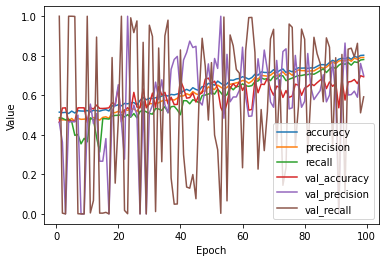

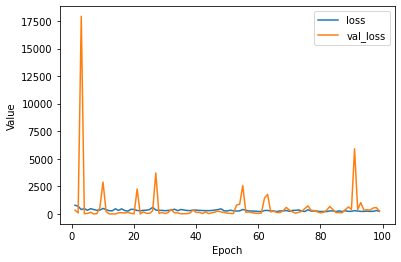

In [43]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 2
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [29]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8620)              74313020  
_________________________________________________________________
Hidden1 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Output (Dense)               (None, 1)                 8621      
Total params: 148,634,661
Trainable params: 148,634,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
351/351 [==============================] - 179s 511ms/step - loss: 1.2918 - accuracy: 0.5412 - precision: 0.5353 - recall: 0.1171 - val_loss: 0.6984 - val_accuracy: 0.5427 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
351/351 [==============================] - 181s 514ms/step - loss: 0.7013 - accuracy: 0.5507 - precision: 0.6426 - recall: 

351/351 [==============================] - 171s 486ms/step - loss: 0.3335 - accuracy: 0.8603 - precision: 0.9162 - recall: 0.7708 - val_loss: 0.9331 - val_accuracy: 0.6709 - val_precision: 0.6125 - val_recall: 0.7635
Epoch 34/100
351/351 [==============================] - 166s 473ms/step - loss: 0.3242 - accuracy: 0.8685 - precision: 0.9208 - recall: 0.7855 - val_loss: 0.8812 - val_accuracy: 0.6933 - val_precision: 0.6486 - val_recall: 0.7186
Epoch 35/100
351/351 [==============================] - 164s 468ms/step - loss: 0.3154 - accuracy: 0.8713 - precision: 0.9206 - recall: 0.7921 - val_loss: 0.9284 - val_accuracy: 0.6362 - val_precision: 0.6207 - val_recall: 0.5259
Epoch 36/100
351/351 [==============================] - 163s 465ms/step - loss: 0.3074 - accuracy: 0.8766 - precision: 0.9252 - recall: 0.7999 - val_loss: 0.8547 - val_accuracy: 0.6883 - val_precision: 0.6806 - val_recall: 0.5998
Epoch 37/100
351/351 [==============================] - 166s 473ms/step - loss: 0.3145 - accu

Epoch 69/100
351/351 [==============================] - 165s 469ms/step - loss: 0.1804 - accuracy: 0.9475 - precision: 0.9711 - recall: 0.9145 - val_loss: 1.3148 - val_accuracy: 0.6846 - val_precision: 0.6707 - val_recall: 0.6098
Epoch 70/100
351/351 [==============================] - 169s 482ms/step - loss: 0.1739 - accuracy: 0.9486 - precision: 0.9666 - recall: 0.9216 - val_loss: 1.4303 - val_accuracy: 0.6755 - val_precision: 0.6821 - val_recall: 0.5439
Epoch 71/100
351/351 [==============================] - 167s 477ms/step - loss: 0.1732 - accuracy: 0.9458 - precision: 0.9671 - recall: 0.9148 - val_loss: 1.3242 - val_accuracy: 0.6896 - val_precision: 0.6935 - val_recall: 0.5758
Epoch 72/100
351/351 [==============================] - 167s 477ms/step - loss: 0.1682 - accuracy: 0.9473 - precision: 0.9687 - recall: 0.9165 - val_loss: 1.4999 - val_accuracy: 0.6782 - val_precision: 0.6384 - val_recall: 0.6836
Epoch 73/100
351/351 [==============================] - 171s 488ms/step - loss: 

## Train 2
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [32]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of ___ nodes
    model.add(tf.keras.layers.Dense(units=8620, input_shape=(8620,)))
              
    # Implement ___ regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=8620, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden1'))
    # Include a dropout layer.
    model.add(tf.keras.layers.Dropout(0.2))
    
    # Implement ___ regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=8620, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden2'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Hidden1 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
dropout (Dropout)            (None, 8620)              0         
_________________________________________________________________
Hidden2 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Output (Dense)               (None, 1)                 8621      
Total params: 222,947,681
Trainable params: 222,947,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
351/351 [==============================] - 303s 864ms/step - loss: 3.2625 - accuracy: 0.5323 -

351/351 [==============================] - 410s 1s/step - loss: 0.4302 - accuracy: 0.8265 - precision: 0.8964 - recall: 0.7098 - val_loss: 0.7548 - val_accuracy: 0.6298 - val_precision: 0.7370 - val_recall: 0.2964
Epoch 33/100
351/351 [==============================] - 428s 1s/step - loss: 0.4309 - accuracy: 0.8298 - precision: 0.9010 - recall: 0.7132 - val_loss: 0.7276 - val_accuracy: 0.6673 - val_precision: 0.7294 - val_recall: 0.4331
Epoch 34/100
351/351 [==============================] - 420s 1s/step - loss: 0.4157 - accuracy: 0.8369 - precision: 0.9043 - recall: 0.7269 - val_loss: 0.7869 - val_accuracy: 0.6773 - val_precision: 0.7046 - val_recall: 0.5070
Epoch 35/100
351/351 [==============================] - 367s 1s/step - loss: 0.4040 - accuracy: 0.8472 - precision: 0.9069 - recall: 0.7490 - val_loss: 0.7741 - val_accuracy: 0.7293 - val_precision: 0.6946 - val_recall: 0.7285
Epoch 36/100
351/351 [==============================] - 356s 1s/step - loss: 0.4014 - accuracy: 0.8427 - 

351/351 [==============================] - 459s 1s/step - loss: 0.2731 - accuracy: 0.9185 - precision: 0.9448 - recall: 0.8763 - val_loss: 0.9856 - val_accuracy: 0.7029 - val_precision: 0.7253 - val_recall: 0.5639
Epoch 69/100
351/351 [==============================] - 415s 1s/step - loss: 0.2677 - accuracy: 0.9240 - precision: 0.9519 - recall: 0.8815 - val_loss: 1.0706 - val_accuracy: 0.6956 - val_precision: 0.6257 - val_recall: 0.8323
Epoch 70/100
351/351 [==============================] - 440s 1s/step - loss: 0.2562 - accuracy: 0.9271 - precision: 0.9558 - recall: 0.8844 - val_loss: 1.0494 - val_accuracy: 0.6764 - val_precision: 0.6915 - val_recall: 0.5279
Epoch 71/100
351/351 [==============================] - 469s 1s/step - loss: 0.2705 - accuracy: 0.9209 - precision: 0.9482 - recall: 0.8783 - val_loss: 1.0377 - val_accuracy: 0.6764 - val_precision: 0.6920 - val_recall: 0.5269
Epoch 72/100
351/351 [==============================] - 366s 1s/step - loss: 0.2635 - accuracy: 0.9249 - 

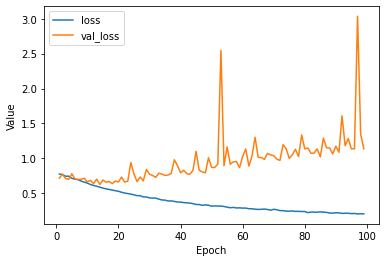

In [33]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 2
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [36]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add the input layer of ___ nodes
    model.add(tf.keras.layers.Dense(units=8620, input_shape=(8620,)))
              
    # Implement ___ regularization in the first hidden layer.
    model.add(tf.keras.layers.Dense(units=8620, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden1'))
    # Include a dropout layer.
    model.add(tf.keras.layers.Dropout(0.2))
    
    # Implement ___ regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=8620, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden2'))
    
    # Include a dropout layer.
    model.add(tf.keras.layers.Dropout(0.2))
    
    # Implement ___ regularization in the second hidden layer.
    model.add(tf.keras.layers.Dense(units=1000, 
                                  activation=activation,
                                  kernel_regularizer=regularization(regularization_lambda),
                                  name='Hidden3'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [37]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.001
epochs = 100
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
Hidden1 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
dropout_3 (Dropout)          (None, 8620)              0         
_________________________________________________________________
Hidden2 (Dense)              (None, 8620)              74313020  
_________________________________________________________________
dropout_4 (Dropout)          (None, 8620)              0         
_________________________________________________________________
Hidden3 (Dense)              (None, 1000)              8621000   
_________________________________________________________________
Output (Dense)               (None, 1)                

351/351 [==============================] - 462s 1s/step - loss: 0.4629 - accuracy: 0.8002 - precision: 0.8910 - recall: 0.6507 - val_loss: 0.8400 - val_accuracy: 0.6330 - val_precision: 0.7210 - val_recall: 0.3224
Epoch 32/100
351/351 [==============================] - 428s 1s/step - loss: 0.4587 - accuracy: 0.8072 - precision: 0.8943 - recall: 0.6650 - val_loss: 0.7043 - val_accuracy: 0.6504 - val_precision: 0.7323 - val_recall: 0.3713
Epoch 33/100
351/351 [==============================] - 436s 1s/step - loss: 0.4488 - accuracy: 0.8172 - precision: 0.8975 - recall: 0.6860 - val_loss: 0.8825 - val_accuracy: 0.6805 - val_precision: 0.6306 - val_recall: 0.7275
Epoch 34/100
351/351 [==============================] - 425s 1s/step - loss: 0.4453 - accuracy: 0.8104 - precision: 0.9091 - recall: 0.6591 - val_loss: 0.7926 - val_accuracy: 0.6969 - val_precision: 0.7123 - val_recall: 0.5659
Epoch 35/100
351/351 [==============================] - 418s 1s/step - loss: 0.4386 - accuracy: 0.8169 - 

KeyboardInterrupt: 